# Capstone Project: Loan Default Classification

#### By: Matthew Wolf

## Context

A high percentage of bank profits come from the interest on home improvement loans and debt consolidation. When loan defaults occur, banks can incur major losses in profit. It is therefore crucial that banks give out loans with care and try to better understand which clients are more or less likely to default on their loans. It is challenging to review clients manually to try and determine whether or not they have good credit or are more likely to default, and individual biases can seep into the process. With machine learning techniques, models can be built to learn the loan approval process and attempt to rid the process of biases. 

## Objective

To bulid a classification model (or multiple models) to predict whether or not clients are likely to default on their loan. This classification model should help to provide recommendations and important features for the bank to consider. 

## Key Questions
* What does the dataset look like and how many null values are there? 
* How should we replace null values and prepare the dataset for a classification algorithm?
* What are some of the relationships or correlations between the numerical and categorical variables?
* How can we evaluate different classification models?
* Which classification models should be used and how should we tune them (Decision Trees, Random Forests, Logistic Regression)?
* What are the most important data features for each of these models, do these models share important features of the data?

## Problem Statement
A bank's consumer credit department aims to simplify the decision-making process for home equity
lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's
guidelines to establish an empirically derived and statistically sound model for credit scoring. The
model will be based on the data obtained via the existing loan underwriting process from recent
applicants who have been given credit. The model will be built from predictive modeling techniques,
but the model created must be interpretable enough to provide a justification for any adverse
behavior (rejections).

## Data Description

The Home Equity dataset (HMEQ) contains baseline and loan performance information for recent
home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has
ultimately defaulted or has been severely delinquent. There are 12 input variables registered for each
applicant.

* **BAD**: 1 = Client defaulted on loan, 0 = loan repaid
* **LOAN**: Amount of loan approved
* **MORTDUE**: Amount due on the existing mortgage
* **VALUE**: Current value of the property
* **REASON**: Reason for the loan request (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)
* **JOB**: The type of job that loan applicant has such as manager, self, etc.
* **YOJ**: Years at present job
* **DEROG**: Number of major derogatory reports (which indicates serious delinquency or late payments).
* **DELINQ**: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due)
* **CLAGE**: Age of the oldest credit line in months
* **NINQ**: Number of recent credit inquiries
* **CLNO**: Number of existing credit lines
* **DEBTINC**: Debt-to-income ratio (all monthly debt payments divided by gross monthly income. This number is one of the ways lenders measure a borrower’s ability to manage the monthly payments to repay the money they plan to borrow)

## Import Libraries and Data Overview

In [1]:
# Install imblearn library 
!pip install imblearn

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

from sklearn import metrics

import scipy.stats as stats

# For hyperparameter tuning and SMOTE analysis 
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

### Load the dataset

In [3]:
# Load and read dataset
loans = pd.read_csv("hmeq.csv")

In [4]:
# Copy data to avoid changes to original dataset
df = loans.copy()

### Initial View of the Data

In [5]:
# View first entries of dataset
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
# View last entries of the dataset
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [7]:
# Look at datatypes and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations:**
* There are 5960 clients or entries in the dataset, and 13 columns.
* There are null-values for most of the data columns, except for repayment outcome (BAD) and loan amount.
* Most of the columns are numerical (int64 or float64), and only two columns have categorical values: reason for loan request, and job of client. 

In [8]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
(df.isnull().sum() / df.shape[0] * 100)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Observations:**
* There are a high percentage of null values for debt-to-income ratio, and also fairly high values for number derogatory reports, number of deliquent credit lines, years at present job, and number of recent credit inquiries.
* Almost all features (except for the loan repayment outcome and the loan amount) have at least some missing values.

### Convert Datatypes: 'Objects' to 'Categories'

In [10]:
# Create list with categorical variables and loan repayment outcome (which is binary and categorical)
cols = df.select_dtypes(['object']).columns.tolist()

cols

['REASON', 'JOB']

In [11]:
# Converting object datatype to category to reduce dataspace
for i in cols:
    df[i] = df[i].astype('category')

In [12]:
# Checking conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   int64   
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(2), float64(9), int64(2)
memory usage: 524.3 KB


## Exploratory Data Analysis

### Visualizing Categorical Variables

In [13]:
# Function for visualizing categorical variables

def perc_on_bar(feature, titl):

    plt.figure(figsize = (8,5))

    ax = sns.countplot(data = df, x = feature)

    for p in ax.patches:
        txt = np.round((p.get_height() / len(feature) * 100), 1)
    
        annot = txt.astype('str')
       
        x = p.get_x() + p.get_width() / 2 - 0.05 
        
        y = p.get_y() + p.get_height()           
        
        ax.annotate(annot + '%', (x,y))

    plt.title(titl)
    
    plt.show()

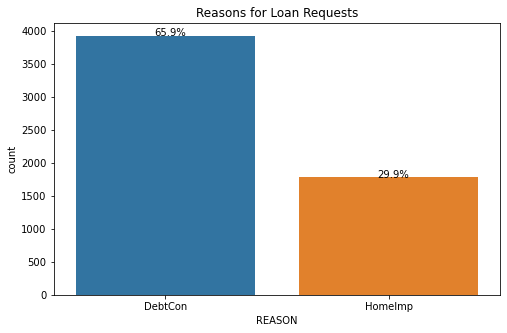

In [14]:
# Plot percentages of reasons for seeking loans in dataset
reas_title = "Reasons for Loan Requests"

perc_on_bar(df["REASON"], reas_title)

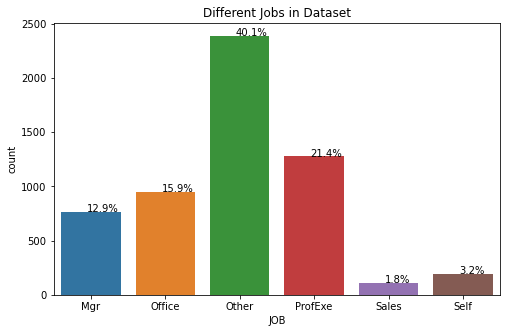

In [15]:
# Plot percentage of different jobs in dataset
job_title = "Different Jobs in Dataset"

perc_on_bar(df["JOB"], job_title)

**Observations**:
* Approximately 66% of loan requests are for debt consolidation, and 30% of loan requests are for home improvement. In 4% of cases, the reason was not listed (null). 
* 40% of the applicants have listed 'Other' as their job, there are also many people who work as professional executives (21%), who work office jobs (16%), and who work as managers (13%), fewer people are self-employed (3%) or work in sales (2%). 

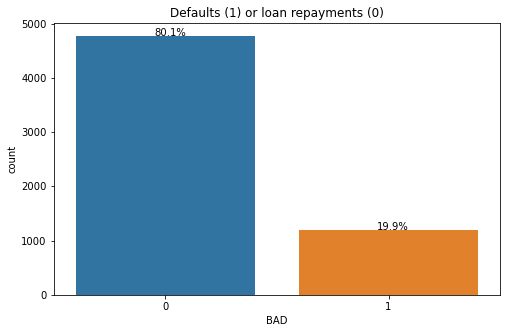

In [16]:
# Plot percentages of loan defaults and repayments in dataset
bad_title = "Defaults (1) or loan repayments (0)"

perc_on_bar(df["BAD"], bad_title)

**Observations**:
* Approximately 20% of our dataset consists of entries where the client defaulted on the loan, and the remaining 80% consists of entries where the client repaid the loan.
* We may need to account for this imbalance by weighting the classification models. 

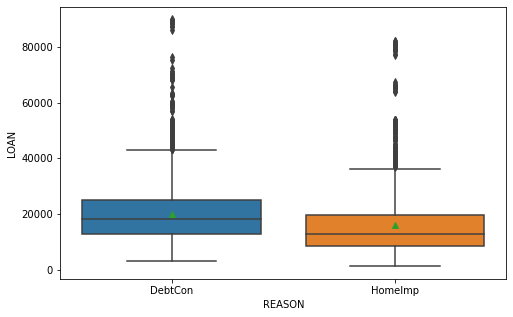

In [17]:
# Compare the loan amounts for home improvement vs. debt consolidation
plt.figure(figsize = (8,5))

sns.boxplot(data = df, x = 'REASON', y = 'LOAN', showmeans = True)

plt.show()

**Observations**: 
* The median and mean loan amounts for debt consolitation are slightly higher compared to loans for home improvements. 
* There is a large range for both types of loans, and many outliers for higher loan amounts in both categories.

In [18]:
pd.pivot_table(data = df, index = "REASON", values ='BAD', aggfunc = ['count', np.mean, np.std]).T

,REASON,DebtCon,HomeImp
count,BAD,3928.000000,1780.000000
mean,BAD,0.189664,0.222472
std,BAD,0.392085,0.416023


**Observations**:
* In the dataset, clients with home improvements have slightly higher default rates (22%) compared to clients with debt consolidation loans (19%), but the standard deviations are high. 


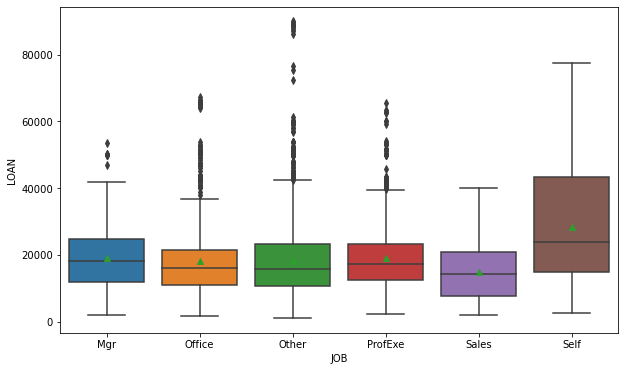

In [19]:
# Create a pivot table to compare loan amounts for different types of jobs
plt.figure(figsize = (10,6))

sns.boxplot(data = df, x = 'JOB', y = 'LOAN', showmeans = True)

plt.show()

**Observations**:
* For managers, office workers, professional executives, and the 'other' categories of jobs, there does not appear to be a large difference in the mean or median loan approval amounts.
* Self-employed clients request and are approved for higher loan amounts on average, and salespeople are approved for lower loan amounts on average, but again, there are fewer salespeople and self-employed clients in the dataset.
* There is a large interquartile range for self-employed clients compared to other clients. 

In [20]:
# Create a pivot table to compare default rates for different types of jobs
pd.pivot_table(df, index = "JOB", values = 'BAD', aggfunc = ['count', np.mean, np.std]).T

,JOB,Mgr,Office,Other,ProfExe,Sales,Self
count,BAD,767.000000,948.000000,2388.000000,1276.000000,109.000000,193.000000
mean,BAD,0.233377,0.131857,0.231993,0.166144,0.348624,0.300518
std,BAD,0.423256,0.338513,0.422193,0.372356,0.478736,0.459676


**Observations**:
* Clients with some specific jobs seem to tend to default more often than other clients, in particular clients with sales jobs (35% defaulted in dataset) and self-employed clients (30% defaulted). 
* It is important to note that there are fewer clients in sales and self-employed compared to other job categories, and that there is a high standard deviation for each of the types of jobs. 

### Visualizing Numerical Variables

### Univariate Analysis

In [21]:
# Create function for univariate analysis on numerical values in dataset
def num_uni(feature, feat_name):
    
        print(feat_name)
        
        print('Skew :',round(feature.skew(), 2))
    
        plt.figure(figsize = (15, 4))
    
        plt.subplot(1, 2, 1)
    
        feature.hist(bins = 10, grid = False)
    
        plt.axvline(feature.mean(), color = "green", linestyle = "--")
    
        plt.axvline(feature.median(), color = "black", linestyle = "--")
    
        plt.ylabel('count')
    
        plt.subplot(1, 2, 2)
    
        sns.boxplot(x = feature, showmeans = True)
    
        plt.show()

LOAN = Amount of Loan
Skew : 2.02


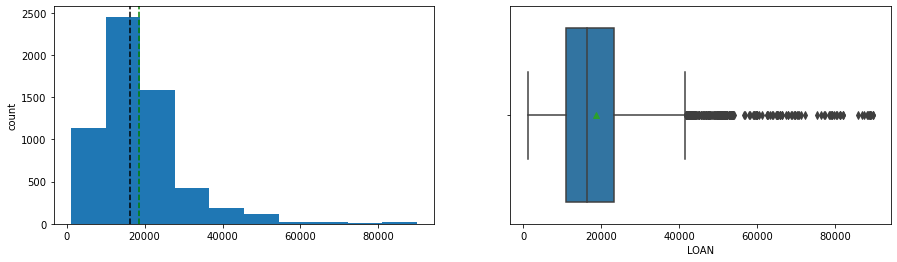

In [22]:
loan_name = "LOAN = Amount of Loan"

num_uni(df["LOAN"], loan_name)

**Observations**:
* Loan amounts are right-skewed, the mean for the loan amounts is close to 18,000, although there are some loans that were approved for nearly 90,000. There are many outliers for loans greater than 45,000. 

MORTDUE = Mortgage Still Due
Skew : 1.81


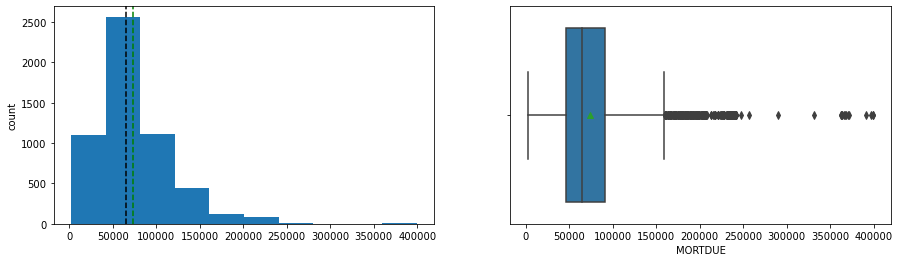

In [23]:
mortdue_name = "MORTDUE = Mortgage Still Due"

num_uni(df["MORTDUE"], mortdue_name)

**Observations**:
* The mean of the amount due on the existing mortgage is close to 75,000, there are many outliers up to 250,000, and a few outliers close to 400,000 still due on the mortgage.

VALUE = Value of Property
Skew : 3.05


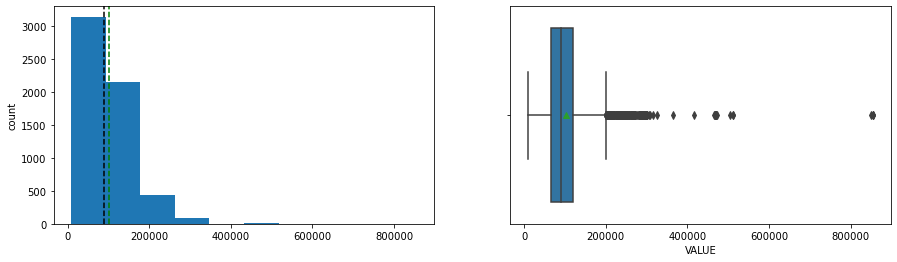

In [24]:
val_name = "VALUE = Value of Property"

num_uni(df["VALUE"], val_name)

**Observations**:
* Current Value of the property is highly right-skewed, with the mean near 100,000 and the majority of properties have less value than this. There are some outliers with property values greater than 200,000, and even a couple greater than 800,000.

YOJ = Years at Present Job
Skew : 0.99


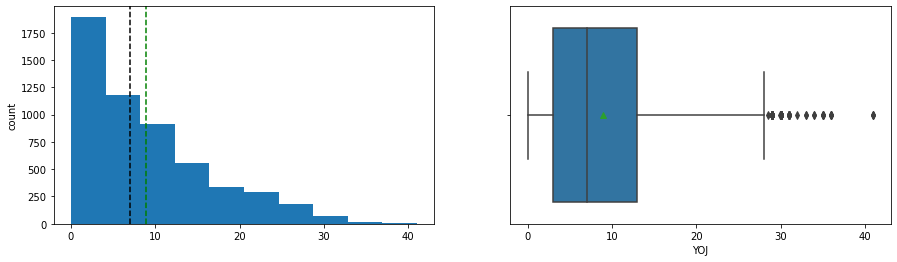

In [25]:
yoj_name = "YOJ = Years at Present Job"

num_uni(df["YOJ"], yoj_name)

**Observations**:
* Years at present job is also right-skewed with 50% of clients having spent 7 or fewer years at their current job. There is a broad range, and some outliers have spent over 30 years at their present jobs. 

DEROG = Number of Derogatory Reports
Skew : 5.32


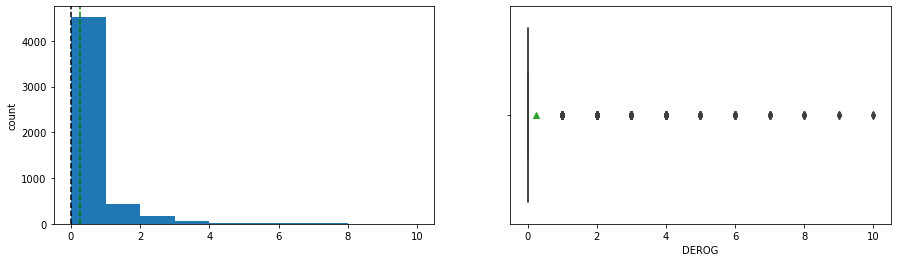

In [26]:
derog_name = "DEROG = Number of Derogatory Reports"

num_uni(df["DEROG"], derog_name)

DELINQ = Number of Delinquent Credit Lines
Skew : 4.02


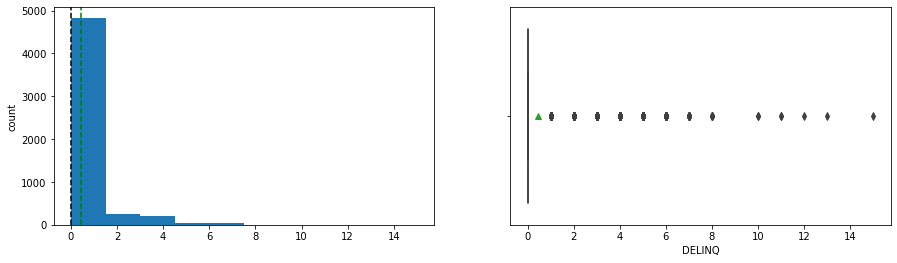

In [27]:
delinq_name = "DELINQ = Number of Delinquent Credit Lines"

num_uni(df["DELINQ"], delinq_name)

**Observations**:
* The majority of clients in the dataset do not have derogatory reports or deliquent credit lines against them, as the median values of these categories is 0, and they are highly right-skewed.

CLAGE = Age of Oldest Credit Line
Skew : 1.34


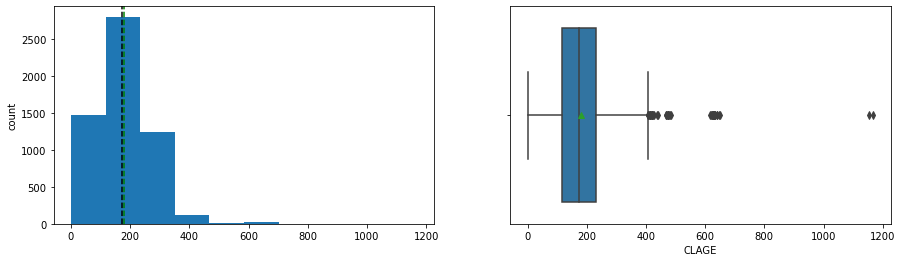

In [28]:
clage_name = "CLAGE = Age of Oldest Credit Line"

num_uni(df["CLAGE"], clage_name)

**Observations**:
* The mean and median values for age of oldest credit line is approximately 180 months (15 years). Most values are between 0 and 400 months, although there are some outliers for older credit lines, and a couple that are close to 1200 months (100 years). This would indicate a credit line for the entire lifetime of the client, and could be an error. 

NINQ = Number of Recent Credit Inquiries
Skew : 2.62


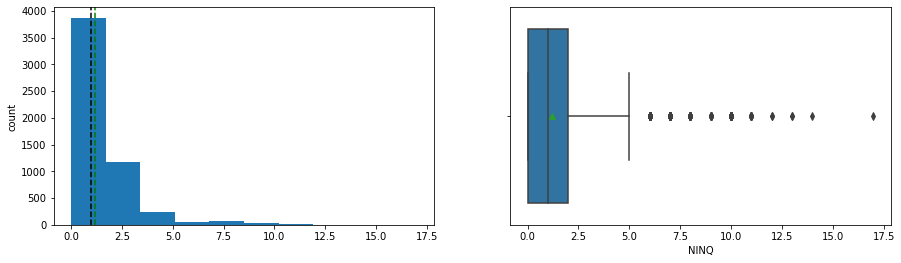

In [29]:
ninq_name = "NINQ = Number of Recent Credit Inquiries"

num_uni(df["NINQ"], ninq_name)

**Observations**:
* Number of recent credit inquiries is right-skewed and has a mean and median close to 1, with some outliers with more than 5 recent credit inquiries.

CLNO = Number of Existing Credit Lines
Skew : 0.78


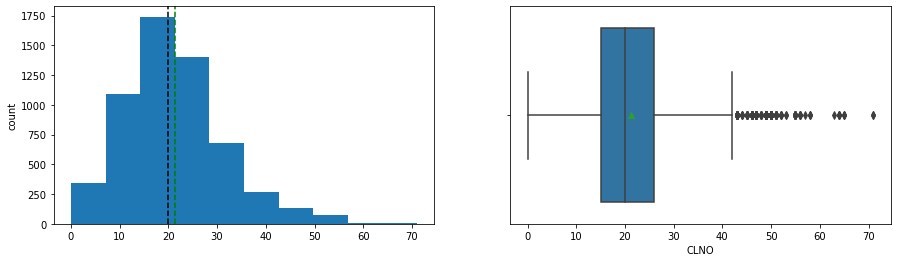

In [30]:
clno_name = "CLNO = Number of Existing Credit Lines"

num_uni(df["CLNO"], clno_name)

**Observations**:
* Number of exisiting credit lines is the least right-skewed distribution for the numerical data, although it is still right-skewed. The median is close to 20, although there are some clients with more than 50 credit lines.

DEBTINC = Debt-to-Income Ratio
Skew : 2.85


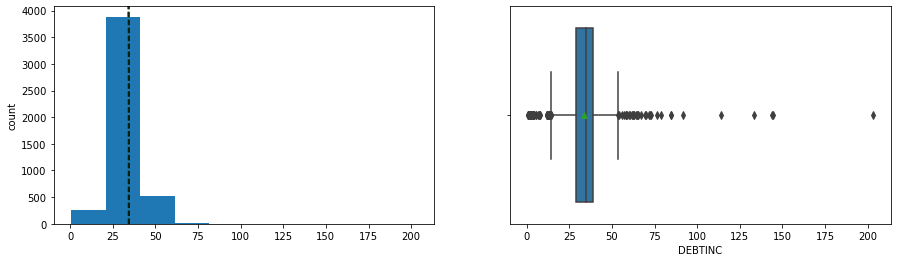

In [31]:
debtinc_name = "DEBTINC = Debt-to-Income Ratio"

num_uni(df["DEBTINC"], debtinc_name)

**Observations**:
* Debt-to-income ratio has a distribution that appears almost normal in the histogram, with a median near 35%. This data is still right-skewed because there are a number of outliers with higher debt-to-income ratios, including at least one client who has a greater than 200% debt-to-income ratio. It is important to note that >20% of the clients have missing values for this feature.

### Bivariate Analysis

#### Numerical vs. Categorical Variables

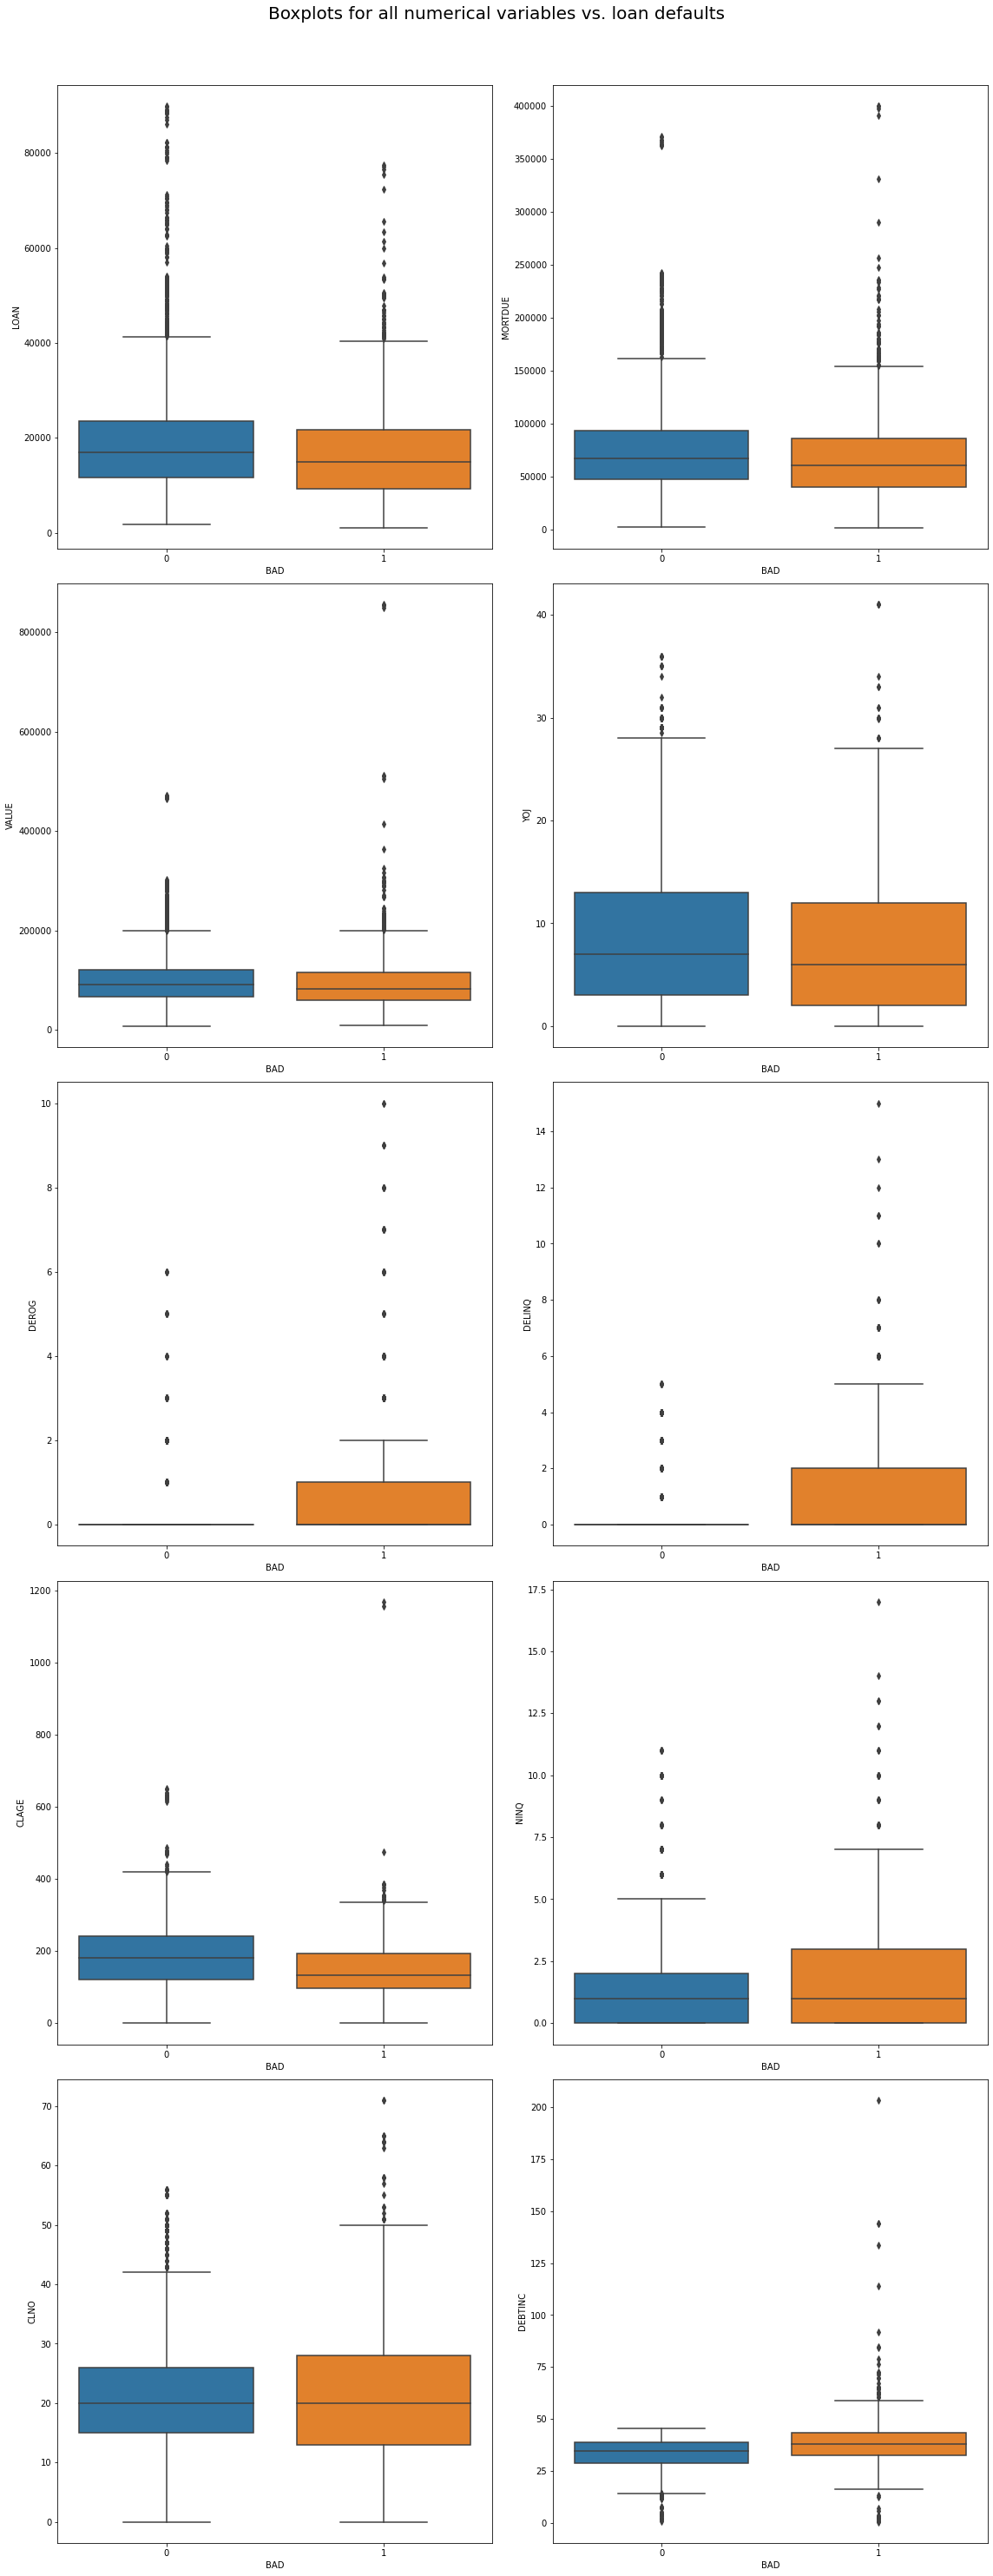

In [32]:
# Visualize the loan outcomes vs. different numerical values
fig, axes = plt.subplots(5, 2, figsize = (16, 42))
    
fig.suptitle('Boxplots for all numerical variables vs. loan defaults', size = 20)

sns.boxplot(x = 'BAD', y = 'LOAN', data = df, ax = axes[0, 0]);

sns.boxplot(x = 'BAD', y = 'MORTDUE', data = df, ax = axes[0, 1]);

sns.boxplot(x = 'BAD', y = 'VALUE', data = df, ax = axes[1, 0]);

sns.boxplot(x = 'BAD', y = 'YOJ', data = df, ax = axes[1, 1]);

sns.boxplot(x = 'BAD', y = 'DEROG', data = df, ax = axes[2, 0]);

sns.boxplot(x = 'BAD', y = 'DELINQ', data = df, ax = axes[2, 1]);

sns.boxplot(x = 'BAD', y = 'CLAGE', data = df, ax = axes[3, 0]);

sns.boxplot(x = 'BAD', y = 'NINQ', data = df, ax = axes[3, 1]);

sns.boxplot(x = 'BAD', y = 'CLNO', data = df, ax = axes[4, 0]);

sns.boxplot(x = 'BAD', y = 'DEBTINC', data = df, ax = axes[4, 1])

fig.tight_layout()

fig.subplots_adjust(top=0.95)

**Observations**:
* The median value for repaid loans is slightly higher than for loans that are defaulted on, although the range in both cases is similar. 
* The median remaining mortgage is slightly higher for repaid loans than loans that are defaulted on, but again the range and interquartile range are similar in both cases. 
* Clients genrally have similar property values for those with repaid loans vs. defaulted loans. 
* The median years at job is slightly higher for clients with repaid loans vs. defaulted loans, though the range is similar overall.
* There is a larger range of values for derogatory reports and deliquent credit lines for those who default, even though the median is still zero for both, there appear to be a higher proportion of defaulting clients with these reports and credit lines compared to clients who have repaid their loans.
* The median age of the oldest credit line is higher for clients with repaid loans compared to those who default on their loans.
* Although the median number of recent inquiries is similar between clients with repaid loans vs. defaulted loans, there is a larger range for those who defaulted, and more outliers with a higher number of recent inquiries.
* The median number of existing credit lines is similar for clients with repaid loans vs. defaulated loans, but there is a larger range for those who defaulted. 
* The median value, range, and number of outliers for debt-to-income ratio is higher for clients who defaulted on their loans compared to clients with repaid loans.

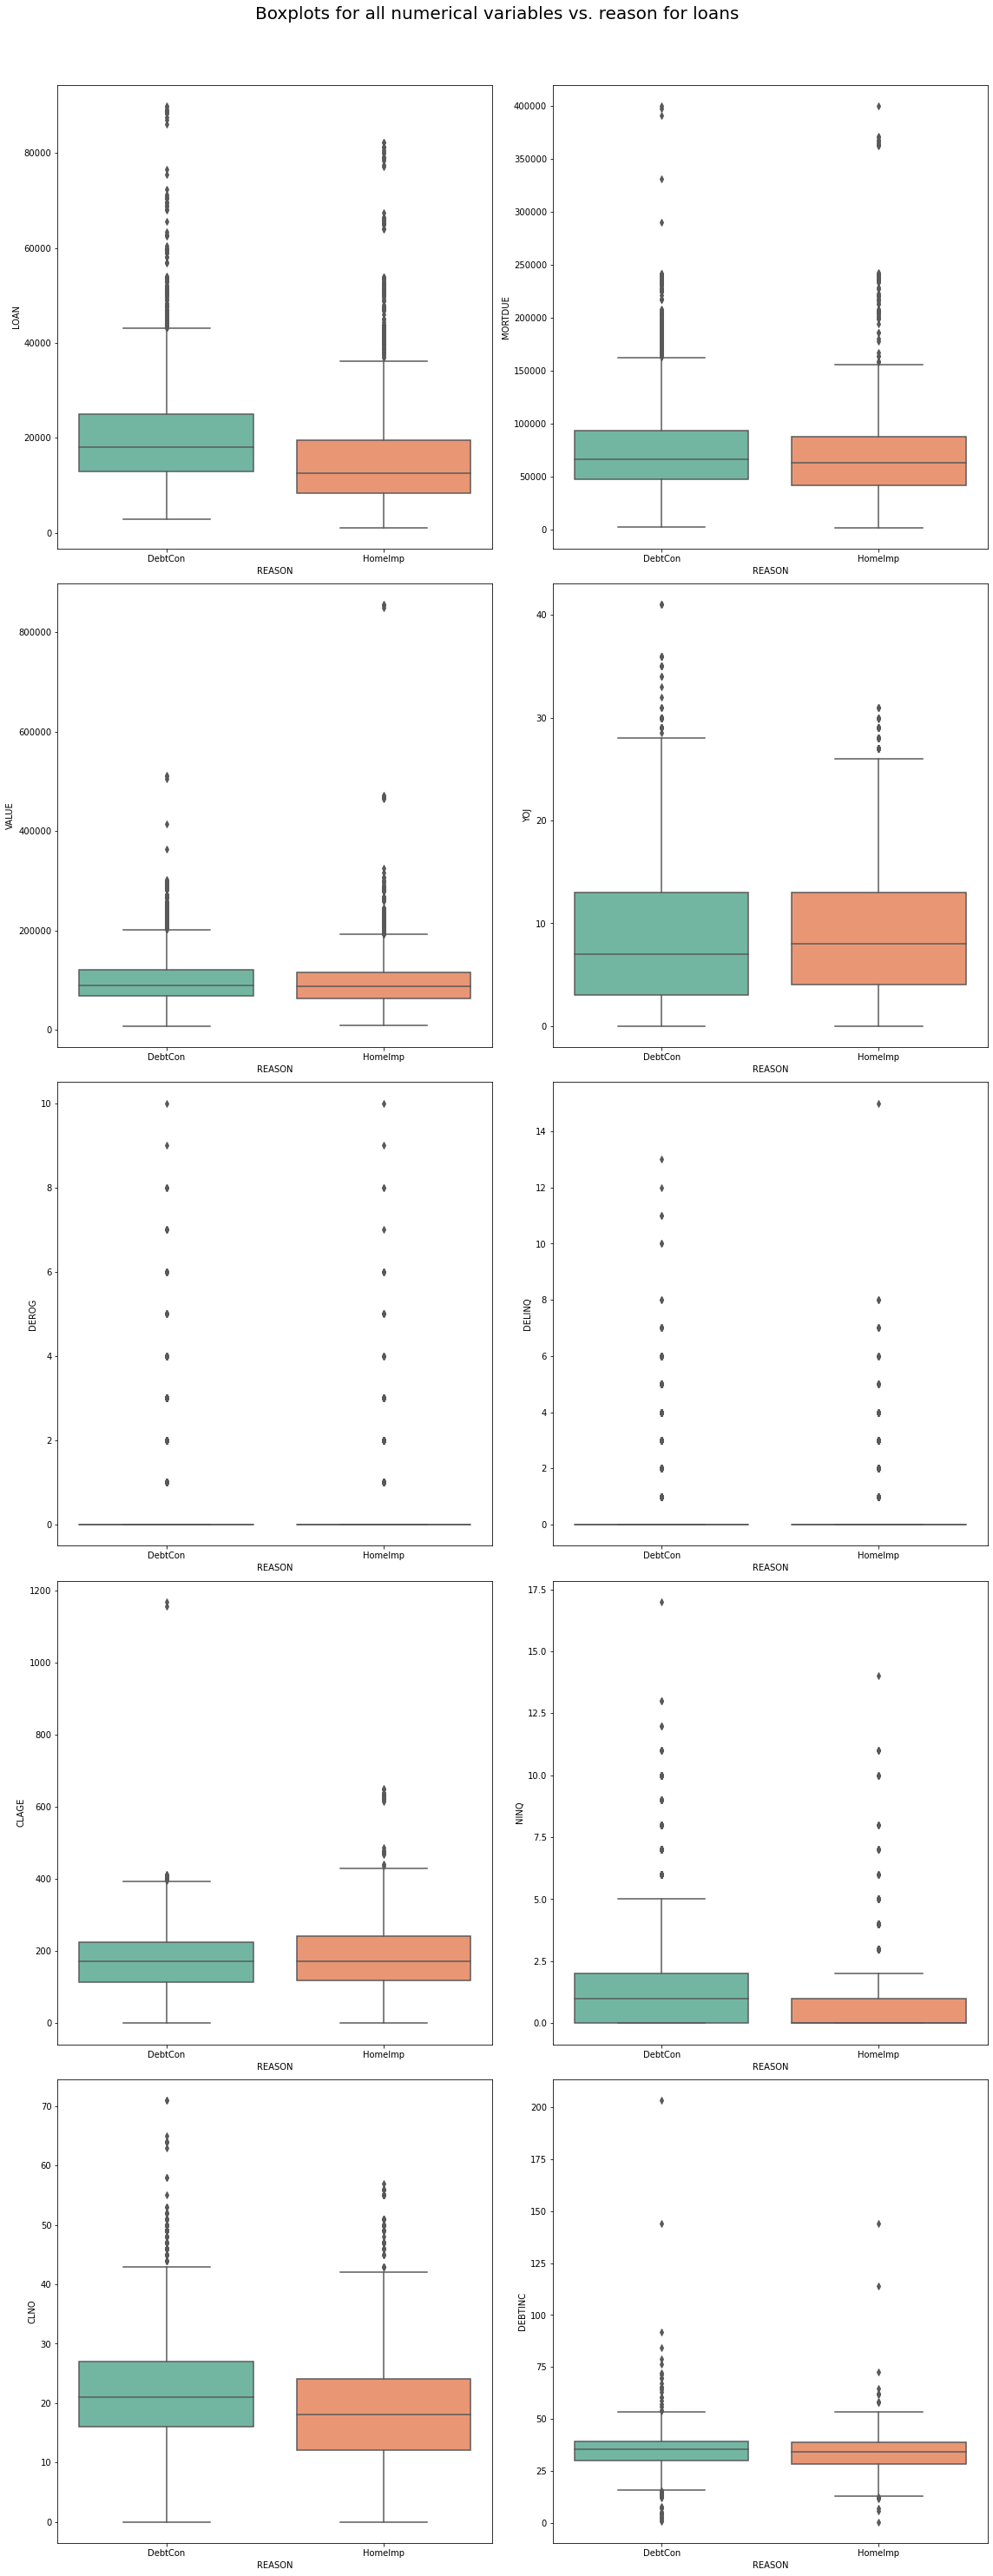

In [33]:
# Visualize reason for loans vs. different numerical values
fig, axes = plt.subplots(5, 2, figsize = (16, 42))
    
fig.suptitle('Boxplots for all numerical variables vs. reason for loans', size = 20)

sns.boxplot(x = 'REASON', y = 'LOAN', data = df, ax = axes[0, 0], palette = "Set2");

sns.boxplot(x = 'REASON', y = 'MORTDUE', data = df, ax = axes[0, 1], palette = "Set2");

sns.boxplot(x = 'REASON', y = 'VALUE', data = df, ax = axes[1, 0], palette = "Set2");

sns.boxplot(x = 'REASON', y = 'YOJ', data = df, ax = axes[1, 1], palette = "Set2");

sns.boxplot(x = 'REASON', y = 'DEROG', data = df, ax = axes[2, 0], palette = "Set2");

sns.boxplot(x = 'REASON', y = 'DELINQ', data = df, ax = axes[2, 1], palette = "Set2");

sns.boxplot(x = 'REASON', y = 'CLAGE', data = df, ax = axes[3, 0], palette = "Set2");

sns.boxplot(x = 'REASON', y = 'NINQ', data = df, ax = axes[3, 1], palette = "Set2");

sns.boxplot(x = 'REASON', y = 'CLNO', data = df, ax = axes[4, 0], palette = "Set2");

sns.boxplot(x = 'REASON', y = 'DEBTINC', data = df, ax = axes[4, 1], palette = "Set2")

fig.tight_layout()

fig.subplots_adjust(top=0.95)

**Observations**:
* For most of the numerical variables, there are not large differences in the median values or range between the two loan acquisition reasons in the dataset (debt consolidation and home improvement). 
* The median loan value and range is higher for debt consolidation loans compared to home improvement loans. 
* There is a higher median number of recent inquiries for clients with debt consolidation loans compared to home improvement loans. 
* The median number of existing credit lines is higher for those with debt consolidation loans compared to home improvment loans. 

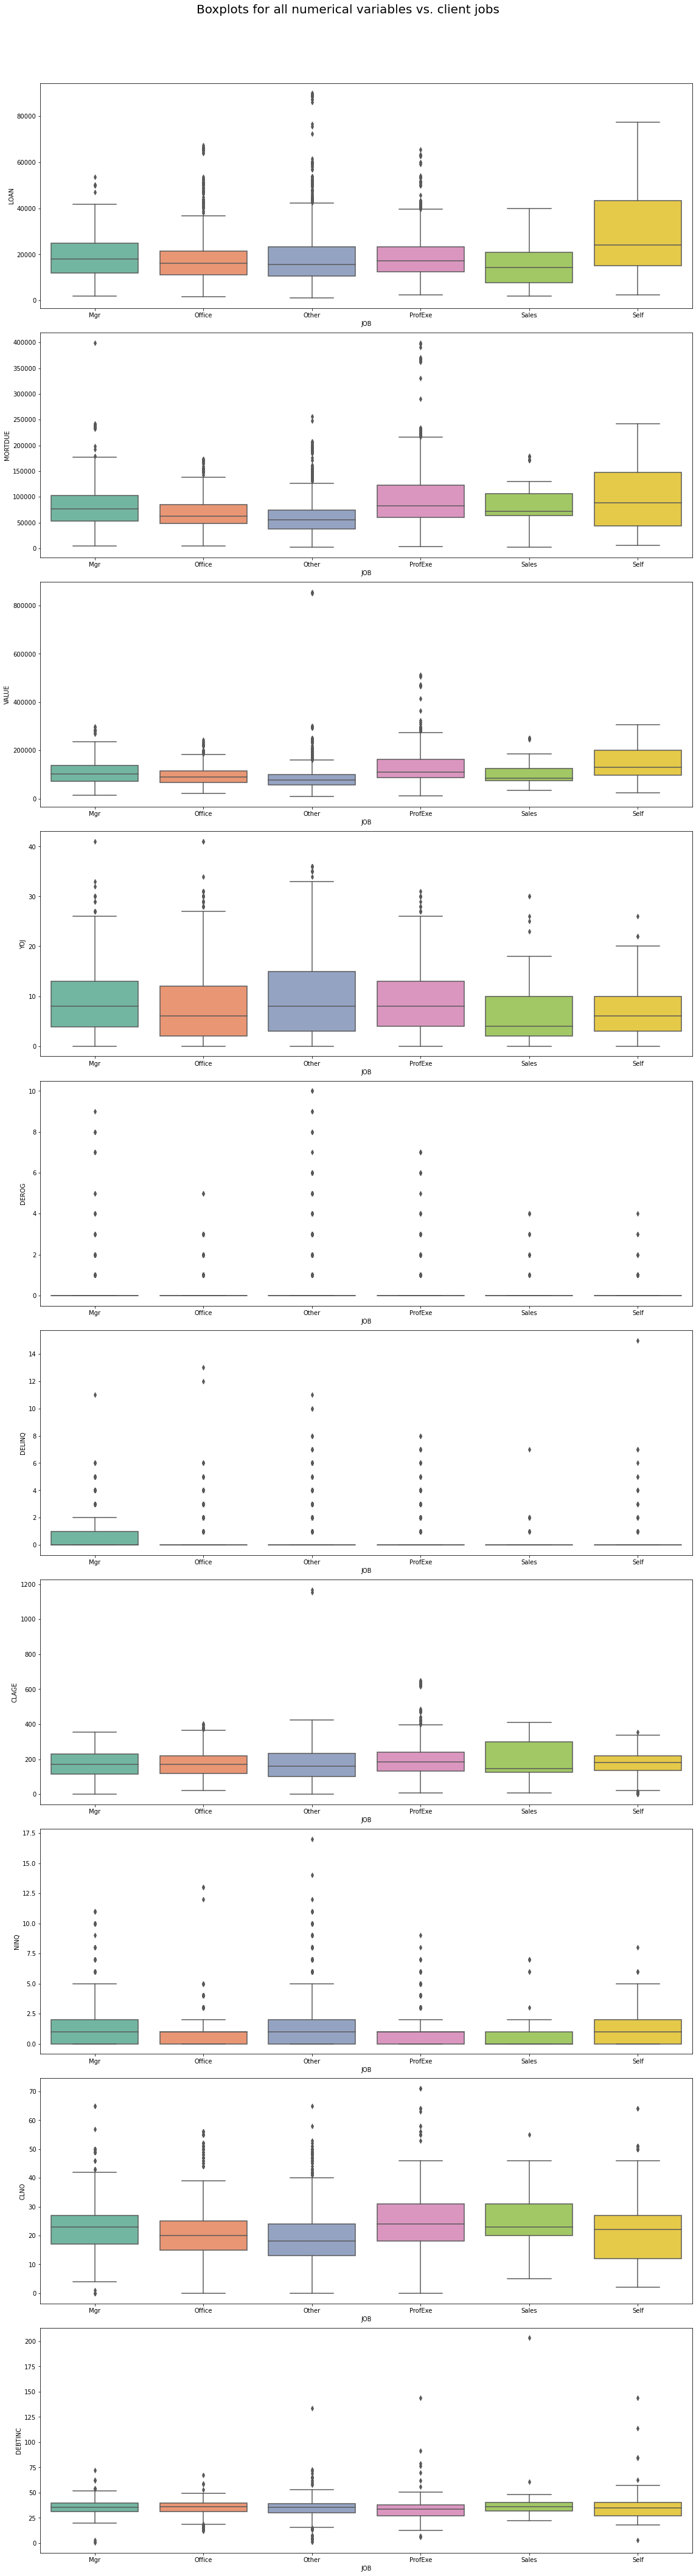

In [34]:
# Visualize reason for loans vs. different numerical values
fig, axes = plt.subplots(10, 1, figsize = (16, 60))
    
fig.suptitle('Boxplots for all numerical variables vs. client jobs', size = 20)

sns.boxplot(x = 'JOB', y = 'LOAN', data = df, ax = axes[0], palette = "Set2");

sns.boxplot(x = 'JOB', y = 'MORTDUE', data = df, ax = axes[1], palette = "Set2");

sns.boxplot(x = 'JOB', y = 'VALUE', data = df, ax = axes[2], palette = "Set2");

sns.boxplot(x = 'JOB', y = 'YOJ', data = df, ax = axes[3], palette = "Set2");

sns.boxplot(x = 'JOB', y = 'DEROG', data = df, ax = axes[4], palette = "Set2");

sns.boxplot(x = 'JOB', y = 'DELINQ', data = df, ax = axes[5], palette = "Set2");

sns.boxplot(x = 'JOB', y = 'CLAGE', data = df, ax = axes[6], palette = "Set2");

sns.boxplot(x = 'JOB', y = 'NINQ', data = df, ax = axes[7], palette = "Set2");

sns.boxplot(x = 'JOB', y = 'CLNO', data = df, ax = axes[8], palette = "Set2");

sns.boxplot(x = 'JOB', y = 'DEBTINC', data = df, ax = axes[9], palette = "Set2")

fig.tight_layout()

fig.subplots_adjust(top=0.95)

**Observations**:
* The median value for loan amounts is higher for self-employed clients compared to other occupations and the interquartile range is larger as well. 
* Median property values are higher for professional executives and self-employed clients.
* Median values for derogatory reports and deliquent credit lines are zero across all jobs. At least 25% of all managers have one or more deliquent credit lines. 
* Mangers, self-employed clients, and those with 'other' jobs have higher median values for number of recent inquiries compared to other jobs. 
* Professional executives, salespeople, and self-employed clients have higher median values for number of credit lines. 
* Median values and ranges for debt-to-income ratio are similar across different jobs. 

#### Numerical vs. Numerical Variables

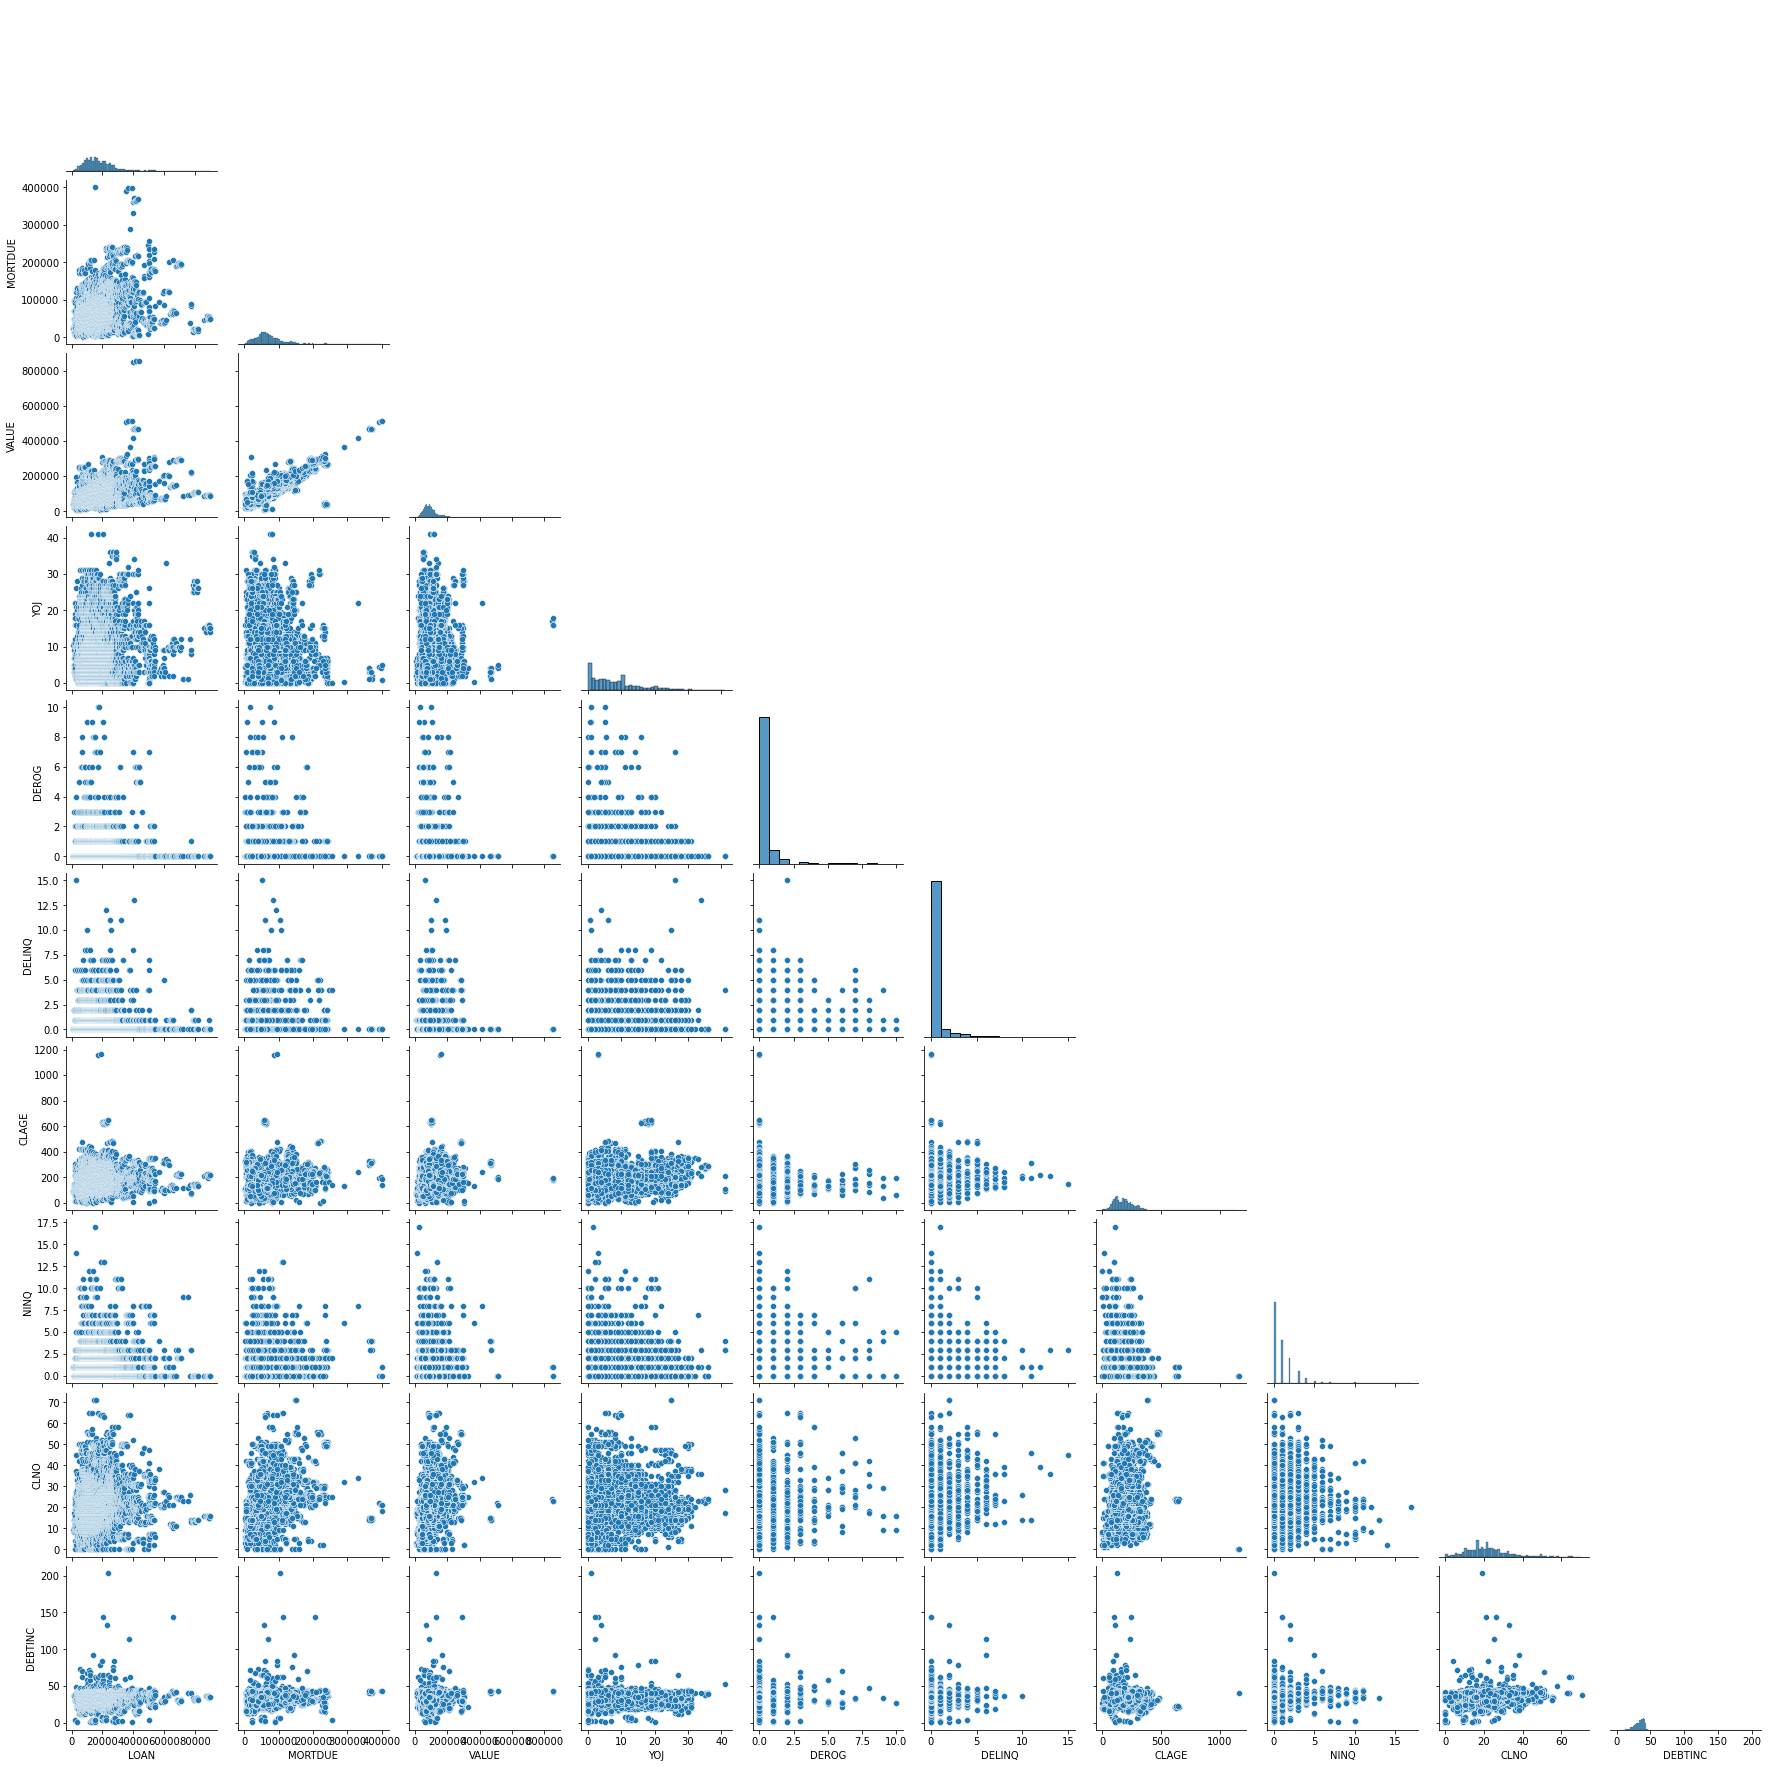

In [35]:
# Create pairplot to look at correlations between numerical variables
sns.pairplot(data = df.iloc[:, 1:], kind = 'scatter', corner = True, dropna = True)

plt.show()

**Observations**: 
* There do not appear to be many strong positive or negative correlations between numerical variables when examining the pairplot. 
* The strongest correlation appears to be a positive one between property value and the amount still due on mortgage. This makes sense, as higher value properties necessitate higher mortgage payments over time. 
* There also appears to be a slight positive correlation between loan amounts and property values - perhaps higher property values require higher value home improvement loans. 

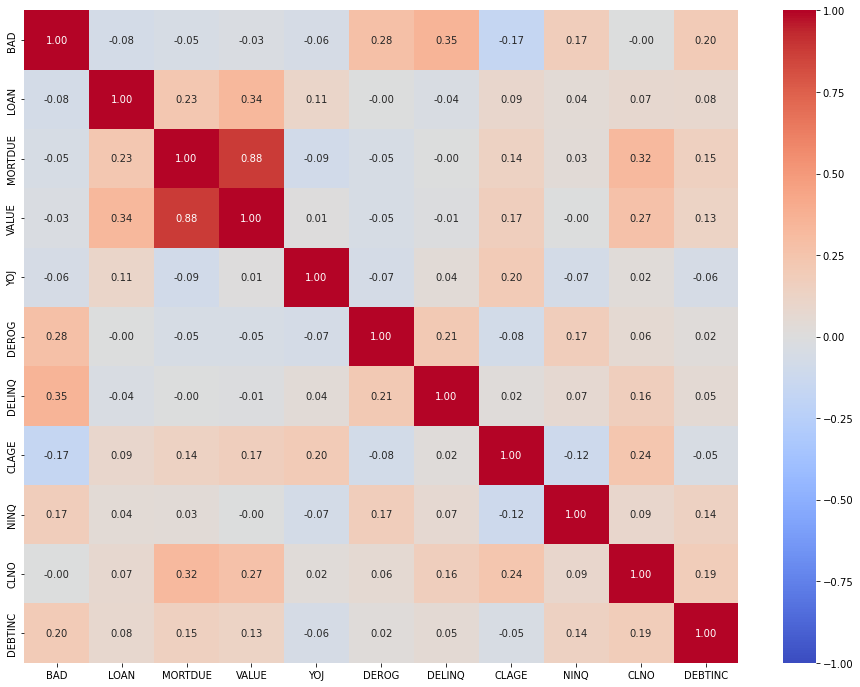

In [36]:
# Plot a heatmap to look at possible correlations between numerical variables
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

corr = df[numerical_col].corr()

plt.figure(figsize=(16,12))

sns.heatmap(corr,cmap='coolwarm', annot = True, vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Observations**: 
* Number of derogatory reports and number of deliquent credit lines are positively correlated with loan defaults, the variable of interest. Number of recent inquiries and debt-to-income ratio also have weaker positive correlation with loan defaults.
* As observed in the pairplot, the strongest correlation is the positive correlation between property value and amount remaining on mortgage (at 0.88). There is also a positive correlation between loan amounts and property value, and a lower positive correlation between loan amounts and mortgage remaining. 
* Most of the other positive correlations between the data features are less than 0.25. There are positive correlations between number of existing credit lines and property value, and number of credit lines and mortgage remaining (0.27 and 0.32, respectively). 
* There is a positive correlation of 0.24 between number of existing credit lines, and age of oldest credit line, this makes sense as it would be expected that more credit lines may be opened over time. 
* The largest negative correlation is -0.17 between the loan default outcome variable and age of oldest credit line. This correlation is still fairly weak, however. 

#### Convert Outcome 'BAD' to Categorical variable

In [37]:
# Change dependent outcome variable to categorical
df['BAD'] = df['BAD'].astype('category')

### Treating data in different ways before Model building

* Different copies or treatments of the data will be created in order to try different methods for dealing with outliers and null values.
* Although it may be important to treat outliers as they can have an outsized effect on the performance of classification models, valuable information is contained in some outliers as well, in particular for the DEROG and DELINQ features in the dataset.
* Below are listed the dataset variables and how the different datasets will be treated:
* **df_treat1**: Missing values will be filled with the median for numerical variables and the mode for categorical, and the values of outliers will be changed to the lower or upper whisker of the variable boxplot.
* **df_treat2**: Missing values will be filled with the median for numerical variables and the mode for categorical, outliers will be kept in the dataset.
* **df_treat3**: Missing values will be filled with the median for numerical variables and the mode for categorical, and the values of outliers will be changed to the lower or upper whisker of the variable boxplot, except for the DEROG and DELINQ for which the outliers were not treated.
* **df_treat4**: Missing values will be filled with the median for numerical variables and the mode for categorical, and the values of outliers will be changed to the lower or upper whisker of the variable boxplot except for the DEROG and DELINQ for which the features will be made binary: all entries greater than zero will be set equal to one.
* **df_treat5**: All entries with missing values will be removed, and the values of outliers will be changed to the lower or upper whisker of the variable boxplot.

* These are not all of the different data treatments that can be done, but they will allow for model comparison between different types of data treatment.

In [38]:
# Copy modified dataframe for different treatments
df_treat1 = df.copy()
df_treat2 = df.copy()
df_treat3 = df.copy()
df_treat4 = df.copy()
df_treat5 = df.copy()

df_treat5.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### Filling in Missing Values

In [39]:
#  Treat Missing values in numerical columns with median and mode in categorical variables, for df_treat 1,2,3,4

# Replace Numerical missing values for df_treat1
for col in df_treat1.select_dtypes('number').iloc[:, 1:]:
    df_treat1[col].fillna(value = df_treat1[col].median(), inplace = True)
    
# Replace categorical missing values for df_treat1
df_treat1["REASON"].fillna(value = "DebtCon", inplace = True)

df_treat1["JOB"].fillna(value = "Other", inplace = True)

# df_treat2
for col in df_treat2.select_dtypes('number').iloc[:, 1:]:
    df_treat2[col].fillna(value = df_treat2[col].median(), inplace = True)
    
df_treat2["REASON"].fillna(value = "DebtCon", inplace = True)

df_treat2["JOB"].fillna(value = "Other", inplace = True)

# df_treat3
for col in df_treat3.select_dtypes('number').iloc[:, 1:]:
    df_treat3[col].fillna(value = df_treat3[col].median(), inplace = True)
    
df_treat3["REASON"].fillna(value = "DebtCon", inplace = True)

df_treat3["JOB"].fillna(value = "Other", inplace = True)

# df_treat4
for col in df_treat4.select_dtypes('number').iloc[:, 1:]:
    df_treat4[col].fillna(value = df_treat4[col].median(), inplace = True)
    
df_treat4["REASON"].fillna(value = "DebtCon", inplace = True)

df_treat4["JOB"].fillna(value = "Other", inplace = True)

In [40]:
# Check if there are any null values remaining.
df_treat4.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

**Observations**:
* The missing numerical values have been replaced with the median for each column and the missing categorical variables have been replaced with the mode ('DebtCon' for REASON, 'Other' for JOB).
* There are no more null values for the treated datasets. 

#### Remove data with missing values for df_treat5

In [41]:
# Remove missing values for df_treat5
df_treat5 = df_treat5.dropna()

In [42]:
# Check for any missing values
df_treat5.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [43]:
# Check shape of df_treat5
df_treat5.shape

(3364, 13)

* Only 3364 entries remain: 56.4% of the original dataset.

### Treating outliers

#### Treating outliers for df_treat1 and df_treat5

In [44]:
# Set outliers to upper or lower whisker bounds of boxplots for df_treat1 and df_treat5
numer_cols = df_treat1.select_dtypes("number")

for col in numer_cols:
    Q1 = np.percentile(df_treat1[col], 25)
    Q3 = np.percentile(df_treat1[col], 75)
    IQR = Q3 - Q1
    Low_whis = Q1 - 1.5*IQR
    High_whis = Q3 + 1.5*IQR
    
    df_treat1[col] = np.clip(df_treat1[col], Low_whis, High_whis)
    
numer_cols5 = df_treat5.select_dtypes("number")

for col in numer_cols5:
    Q1 = np.percentile(df_treat5[col], 25)
    Q3 = np.percentile(df_treat5[col], 75)
    IQR = Q3 - Q1
    Low_whis = Q1 - 1.5*IQR
    High_whis = Q3 + 1.5*IQR
    
    df_treat5[col] = np.clip(df_treat5[col], Low_whis, High_whis)    

MORTDUE = Mortgage Still Due
Skew : 0.62


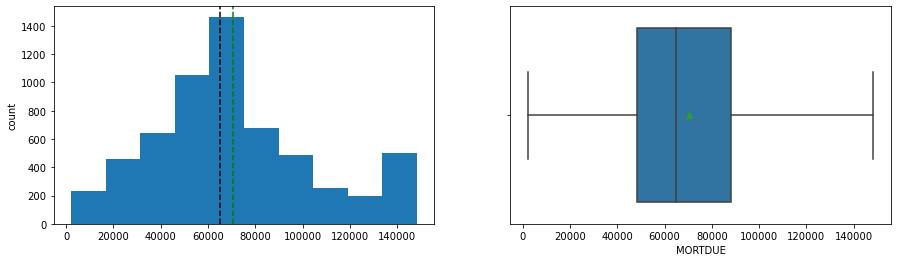

CLAGE = Age of Oldest Credit Line
Skew : 0.48


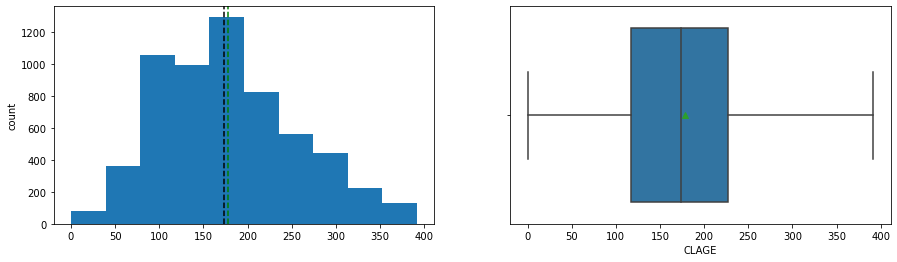

MORTDUE = Mortgage Still Due
Skew : 0.67


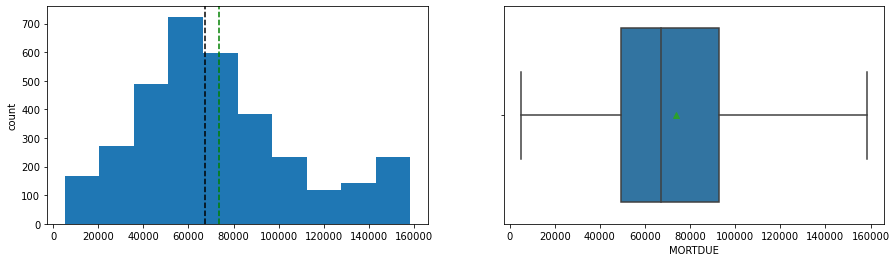

In [45]:
# Look at a couple of examples of treated numerical variables
mortdue_name = "MORTDUE = Mortgage Still Due"

num_uni(df_treat1["MORTDUE"], mortdue_name)

clage_name = "CLAGE = Age of Oldest Credit Line"

num_uni(df_treat1["CLAGE"], clage_name)

mortdue_name = "MORTDUE = Mortgage Still Due"

num_uni(df_treat5["MORTDUE"], mortdue_name)

**Observations**:
* The distributions for these numerical variables are no longer as heavily right-skewed because the outliers (which were all higher values for these two variables) have been adjusted down to the upper whisker of the boxplots (1.5 times the interquartile range).

#### Treating outliers for df_treat3

In [46]:
# Set outliers to upper or lower whisker bounds of boxplots for df_treat3, except for DEROG and DELINQ variables
numer_cols3 = ["LOAN", "MORTDUE", "VALUE", "YOJ", "CLAGE", "NINQ", "CLNO", "DEBTINC"]

for col in numer_cols3:
    Q1 = np.percentile(df_treat3[col], 25)
    Q3 = np.percentile(df_treat3[col], 75)
    IQR = Q3 - Q1
    Low_whis = Q1 - 1.5*IQR
    High_whis = Q3 + 1.5*IQR
    
    df_treat3[col] = np.clip(df_treat3[col], Low_whis, High_whis)

MORTDUE = Mortgage Still Due
Skew : 0.62


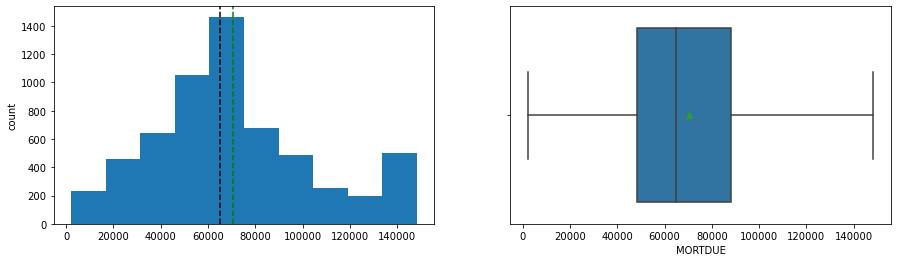

DEBTINC = debt-to-income ratio
Skew : -0.53


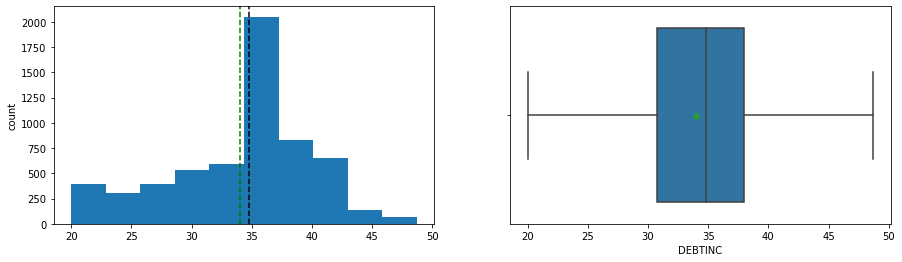

DEROG = Number of Derogatory reports
Skew : 5.69


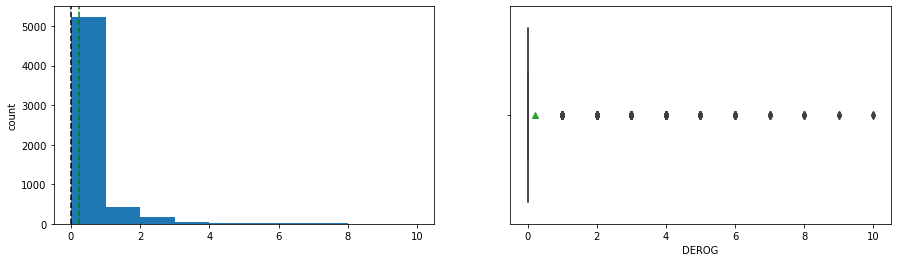

In [47]:
# Look at a couple of examples of treated numerical variables
mortdue_name = "MORTDUE = Mortgage Still Due"

num_uni(df_treat3["MORTDUE"], mortdue_name)

debtinc_name = "DEBTINC = debt-to-income ratio"

num_uni(df_treat3["DEBTINC"], debtinc_name)

derog_name = "DEROG = Number of Derogatory reports"

num_uni(df_treat3["DEROG"], derog_name)

#### Treating outliers for df_treat4

In [48]:
# Set outliers to upper or lower whisker bounds of boxplots for df_treat3, except for DEROG and DELINQ variables
numer_cols4 = ["LOAN", "MORTDUE", "VALUE", "YOJ", "CLAGE", "NINQ", "CLNO", "DEBTINC"]

for col in numer_cols4:
    Q1 = np.percentile(df_treat4[col], 25)
    Q3 = np.percentile(df_treat4[col], 75)
    IQR = Q3 - Q1
    Low_whis = Q1 - 1.5*IQR
    High_whis = Q3 + 1.5*IQR
    
    df_treat4[col] = np.clip(df_treat4[col], Low_whis, High_whis)

In [49]:
# Making DEROG and DELINQ binary variables
df_treat4['DEROG'].loc[df_treat4['DEROG'] >= 1] = 1

df_treat4['DELINQ'].loc[df_treat4['DELINQ'] >= 1] = 1

## Approaches to Model Building

**Techniques to explore**:
* Split data into training and testing sets.
* Decision Trees - high degree of interpretability and relative simplicity, but can easily result in overfitting.
* Random Forests - can have high degree of generalization and high independece through sampling features at each node, but less interpretable compared to decisions trees.
* Logistic Regression - sigmoidal curve classification model.
* Tune models using GridSearchCV.

**Overall Solution Design**:
* The 'BAD' outcome variable will have to be set as the y-variable, and dummy variables will need to be encoded for the categorical variables.
* Data will have to be split between training data and testing data (probably 70/30 or 75/25).
* A decision tree model will be used and a check will be performed for overfitting. The model hyperparameters will be tuned if need be, and the importance of different features in the model will be quantified. 
* Random Forest and Logistic Regression models will also be developed and evaluated in a similar manner.

**Measures of Success**:
* The bank wants to minimize giving loans to clients who will then default on their loans. This is an example of a false negative - predicting that the client will be a 0 (repaid loan) when the outcome is 1 (defaulting on the loan). 
* Therefore, recall should be minimized in the classification model to prevent major profit losses for the bank. 
* Precision and F1 score will also be examined as metrics of evaluation. 
* The recall, precision, and accuracy scores for the training data and testing data will be compared in order to determine if the model is overfitting the training data. 
* For the decision tree model, the relative entropies of different nodes can also be examined to see how 'pure' or 'mixed' the leaves are. 

### Data Splitting for Modeling

In [50]:
# Set 'BAD' which is loan defaults, to dependent variable
X1 = df_treat1.drop(columns = 'BAD')

Y1 = df_treat1['BAD']

X2 = df_treat2.drop(columns = 'BAD')

Y2 = df_treat2['BAD']

X3 = df_treat3.drop(columns = 'BAD')

Y3 = df_treat3['BAD']

X4 = df_treat4.drop(columns = 'BAD')

Y4 = df_treat4['BAD']

X5 = df_treat5.drop(columns = 'BAD')

Y5 = df_treat5['BAD']

In [51]:
# Create dummy values for categorical variables
X1 = pd.get_dummies(X1, prefix = ['REASON', 'JOB'], columns = ['REASON', 'JOB'])

X2 = pd.get_dummies(X2, prefix = ['REASON', 'JOB'], columns = ['REASON', 'JOB'])

X3 = pd.get_dummies(X3, prefix = ['REASON', 'JOB'], columns = ['REASON', 'JOB'])

X4 = pd.get_dummies(X4, prefix = ['REASON', 'JOB'], columns = ['REASON', 'JOB'])

X5 = pd.get_dummies(X5, prefix = ['REASON', 'JOB'], columns = ['REASON', 'JOB'])

In [52]:
# Splitting data in to training and testing sets, 70/30
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.30, random_state = 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.30, random_state = 1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size = 0.30, random_state = 1)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size = 0.30, random_state = 1)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size = 0.30, random_state = 1)

In [53]:
# Checking Splitting
print("Shape of the training set: ", X5_train.shape)   

print("Shape of the test set: ", X5_test.shape)

print("Percentage of classes in the training set:")

print(y5_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y5_test.value_counts(normalize = True))

Shape of the training set:  (2354, 18)
Shape of the test set:  (1010, 18)
Percentage of classes in the training set:
0    0.913764
1    0.086236
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.90396
1    0.09604
Name: BAD, dtype: float64


**Observations**:
* For the data treatments 1-4, the splits are all close to 80/20 repayments/defaults in both the training and testing sets which was also the case for the overall dataset.
* However for treatment 5 where all of the entries with null values were removed, the class percentages are close to 90/10 repayments/defaults, which indicates that more of the loan default entries had at least one null value. 
* Data treatment 5 may not be as useful for building a robust model, but will still be used initially for comparison to other data treatments.

### Create a function to help measure success of model

In [54]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Repaid', 'Defaulted'], yticklabels = ['Repaid', 'Defaulted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### Building Decision Tree Models

**Data Treatment 1 Decision Tree**

In [55]:
# Fitting decision tree classifier on data with class weights
d_tree1 =  DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

d_tree1.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



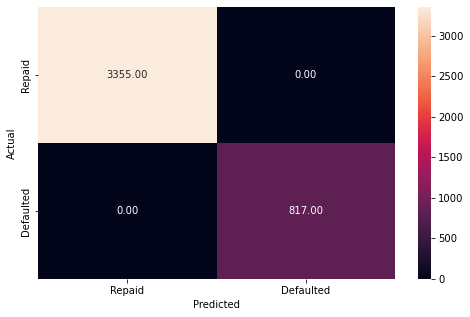

In [56]:
# Checking fit on training data
y_pred_train1 = d_tree1.predict(X1_train)

metrics_score(y1_train, y_pred_train1)

**Observations**:
* With 100% accuracy, precision, and recall, it looks like the decision tree model is overfitting the first treated dataset.
* The model performance on the test data needs to be checked.

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1416
           1       0.68      0.59      0.63       372

    accuracy                           0.86      1788
   macro avg       0.79      0.76      0.77      1788
weighted avg       0.85      0.86      0.85      1788



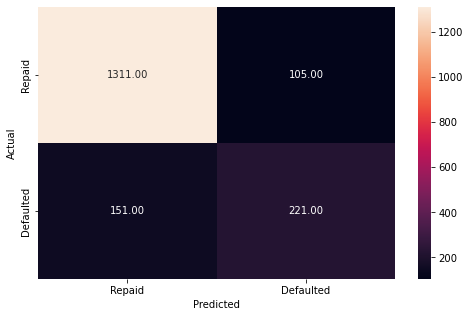

In [57]:
# Checking fit on testing data
y_pred_test1 = d_tree1.predict(X1_test)

metrics_score(y1_test, y_pred_test1)

**Observations**:
* Although the recall and precision for clients who repaid their loans is high (0.93 and 0.90), recall and precision for those who defaulted are low (0.68 and 0.59). 
* This model will need to be tuned to improve recall for class 1.
* But first, other datasets will be used with decision tree models to compare.

**Data Treatment 2 Decision Tree**

In [58]:
# Fitting decision tree classifier on data with class weights
d_tree2 =  DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

d_tree2.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



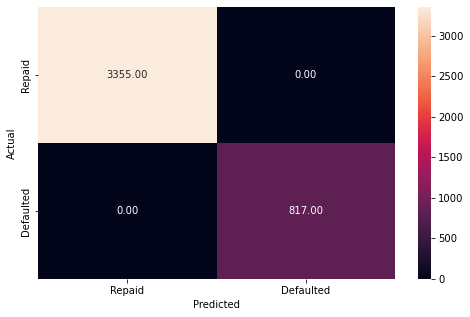

In [59]:
# Checking fit on training data
y_pred_train2 = d_tree2.predict(X2_train)

metrics_score(y2_train, y_pred_train2)

**Observations**:
* Again, with a different treated dataset, there is 100% accuracy, precision, and recall, and it looks like the decision tree model is overfitting the second treated dataset.


              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1416
           1       0.69      0.62      0.65       372

    accuracy                           0.86      1788
   macro avg       0.80      0.77      0.78      1788
weighted avg       0.86      0.86      0.86      1788



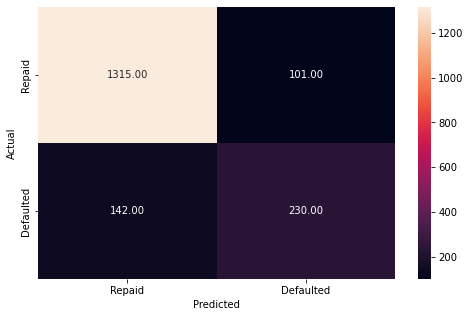

In [60]:
# Checking fit on testing data
y_pred_test2 = d_tree2.predict(X2_test)

metrics_score(y2_test, y_pred_test2)

**Observations**:
* The decision tree is still underfitting the testing data and overfitting the training data.
* The second data treatment (with null values filled, but without treating outliers) results in slightly better recall and precision for class 1 (loan defaults) compared to the first data treatment that treated outliers. 

**Data Treatment 3 Decision Tree**

In [61]:
# Fitting decision tree classifier on data with class weights
d_tree3 =  DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

d_tree3.fit(X3_train, y3_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



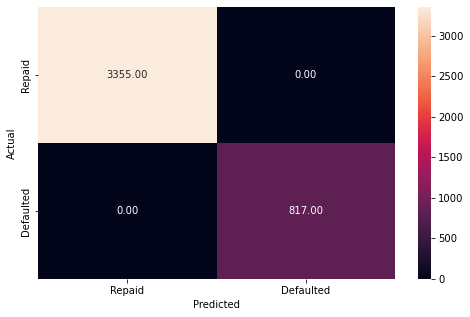

In [62]:
# Checking fit on training data
y_pred_train3 = d_tree3.predict(X3_train)

metrics_score(y3_train, y_pred_train3)

**Observations**:
* Once again, with a different treated dataset, there is 100% accuracy, precision, and recall, and it looks like the decision tree model is overfitting the third treated dataset.

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1416
           1       0.70      0.60      0.64       372

    accuracy                           0.86      1788
   macro avg       0.80      0.76      0.78      1788
weighted avg       0.86      0.86      0.86      1788



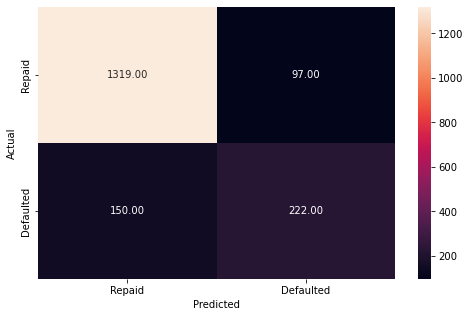

In [63]:
# Checking fit on testing data
y_pred_test3 = d_tree3.predict(X3_test)

metrics_score(y3_test, y_pred_test3)

**Observations**:
* The decision tree is still underfitting the testing data and overfitting the training data.
* The third data treatment decision tree results in a slightly worse recall value compared to the second data treatment.

**Data Treatment 4 Decision Tree**

In [64]:
# Fitting decision tree classifier on data with class weights
d_tree4 =  DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

d_tree4.fit(X4_train, y4_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



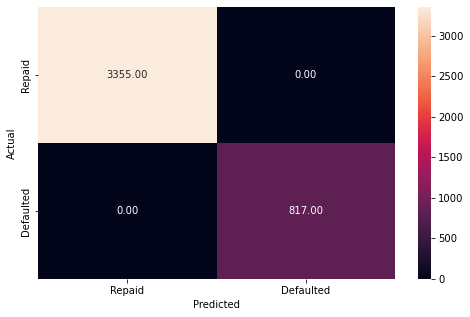

In [65]:
# Checking fit on training data
y_pred_train4 = d_tree4.predict(X4_train)

metrics_score(y4_train, y_pred_train4)

**Observations**:
* Same as above with the fourth treated dataset, there is 100% accuracy, precision, and recall, and it looks like the decision tree model is overfitting the testing dataset.

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1416
           1       0.69      0.58      0.63       372

    accuracy                           0.86      1788
   macro avg       0.79      0.75      0.77      1788
weighted avg       0.85      0.86      0.85      1788



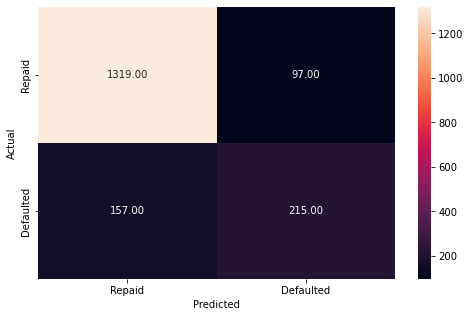

In [66]:
# Checking fit on testing data
y_pred_test4 = d_tree4.predict(X4_test)

metrics_score(y4_test, y_pred_test4)

**Observations**:
* The decision tree is still underfitting the testing data and overfitting the training data.
* The fourth data treatment decision tree results in a slightly worse recall value compared to the second data treatment and the third data treatment.

**Data Treatment 5 Decision Tree**

In [67]:
# Fitting decision tree classifier on data with class weights
d_tree5 =  DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.1, 1: 0.9})

d_tree5.fit(X5_train, y5_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2151
           1       1.00      1.00      1.00       203

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354



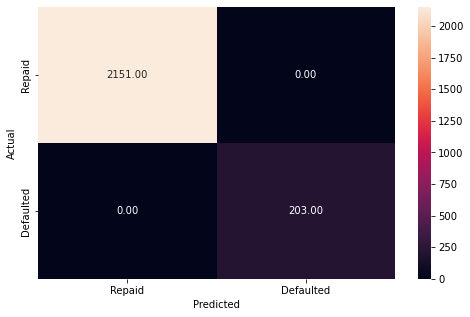

In [68]:
# Checking fit on training data
y_pred_train5 = d_tree5.predict(X5_train)

metrics_score(y5_train, y_pred_train5)

**Observations**:
* Same as above with the fifth treated dataset, there is 100% accuracy, precision, and recall, and it looks like the decision tree model is overfitting the testing dataset.

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       913
           1       0.71      0.38      0.50        97

    accuracy                           0.93      1010
   macro avg       0.82      0.68      0.73      1010
weighted avg       0.92      0.93      0.92      1010



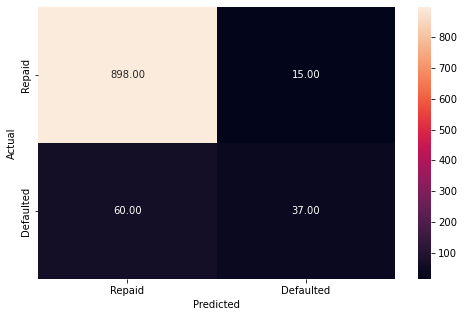

In [69]:
# Checking fit on testing data
y_pred_test5 = d_tree5.predict(X5_test)

metrics_score(y5_test, y_pred_test5)

**Observations**:
* There are many fewer defaulting entries in data treatment 5, and therefore very few in the test data. 
* The recall score for class 1 (defaults) is particularly low - 0.38. 
* This data treatment where all entries with at least one null value were removed is should not be used going forward with the decisiont tree model.

### Overall Observations: Initial Decision Tree Model
* The weighted decision tree resulted in overfitting of the training data for each of the differently treated datasets with 100% recall, accuracy, and precision.
* Recall and precision for class 1 (defaults) were much lower for the testing datasets and the decision tree must be tuned.
* Data treatment 5, which included only 56.4% of the original data, and for which only ~10% of entries were defaults led to a decision tree that scored very low on recall. 
* The other data treatments resulted in decision trees that had recall scores between 0.58 and 0.62 for recall, with the highest recall score resulting from data treatment 2.
* **Data treatment 2 will be used for decision tree models going forward** - this data was treated by filling null values with the median for numerical variables and the mode for categorical variables, and not treating the outliers.

#### Removing class weights from decision tree

* Out of interest, weights will be removed from the decision tree and compared to the initial decision tree model.

In [70]:
# Fitting decision tree classifier on data without class weights
d_tree2_nc =  DecisionTreeClassifier(random_state = 7)

d_tree2_nc.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



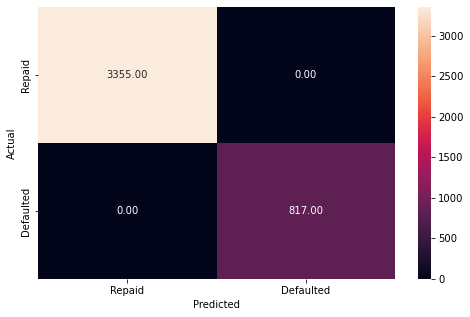

In [71]:
# Checking fit on training data
y_pred_train2_nc = d_tree2_nc.predict(X2_train)

metrics_score(y2_train, y_pred_train2_nc)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1416
           1       0.70      0.59      0.64       372

    accuracy                           0.86      1788
   macro avg       0.80      0.76      0.78      1788
weighted avg       0.86      0.86      0.86      1788



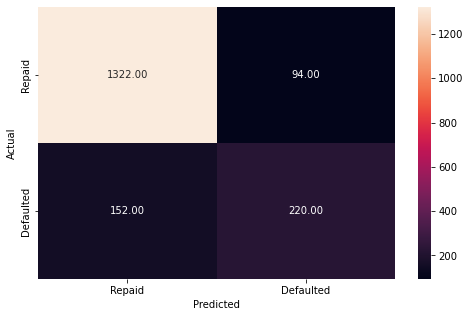

In [72]:
# Checking fit on testing data
y_pred_test2_nc = d_tree2_nc.predict(X2_test)

metrics_score(y2_test, y_pred_test2_nc)

**Observations**: 
* Overall the model is not very different with and without class weights, however the recall score for class 1 is slightly lower for the model without weights (0.59) compared to the model with weights (0.62).

#### Checking other train/test data splitting ratios

* Train test splits of 75/25 and 80/20 will be examined with data treatment 2 to see if it improves any metrics for the decision tree model.

In [73]:
# Split training and testing data into 75/25
X2_train25, X2_test25, y2_train25, y2_test25 = train_test_split(X2, Y2, test_size = 0.25, random_state = 1)

# Split training and testing data into 80/20
X2_train20, X2_test20, y2_train20, y2_test20 = train_test_split(X2, Y2, test_size = 0.20, random_state = 1)

In [74]:
# Fitting decision tree classifier on data with class weights for 75/25 split
d_tree2_25 =  DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

d_tree2_25.fit(X2_train25, y2_train25)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      1.00      1.00       870

    accuracy                           1.00      4470
   macro avg       1.00      1.00      1.00      4470
weighted avg       1.00      1.00      1.00      4470



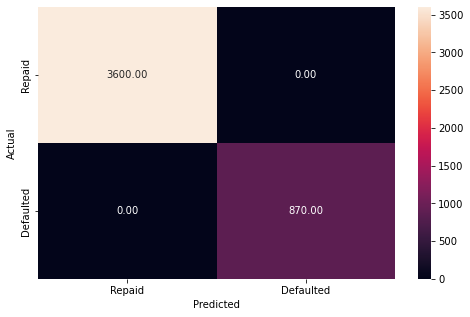

In [75]:
# Checking fit on training data for 75/25 split
y_pred_train2_25 = d_tree2_25.predict(X2_train25)

metrics_score(y2_train25, y_pred_train2_25)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1171
           1       0.71      0.61      0.66       319

    accuracy                           0.86      1490
   macro avg       0.80      0.77      0.79      1490
weighted avg       0.86      0.86      0.86      1490



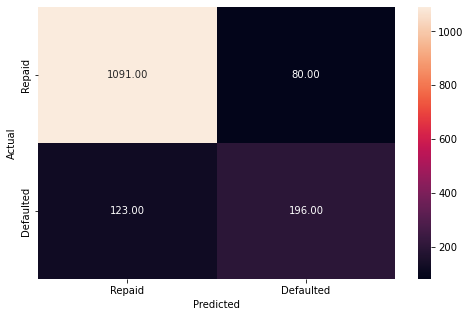

In [76]:
# Checking fit on testing data for 75/25 split
y_pred_test2_25 = d_tree2_25.predict(X2_test25)

metrics_score(y2_test25, y_pred_test2_25)

**Observations**: 
* The 75/25 train/test split results in a slightly higher precision score (0.71 vs. 0.69) compared to the 70/30 split, but a slightly lower recall score (0.61 vs. 0.62). 
* Overall the results are similar between these two data split ratios.

In [77]:
# Fitting decision tree classifier on data with class weights for 80/20 split
d_tree2_20 =  DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

d_tree2_20.fit(X2_train20, y2_train20)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



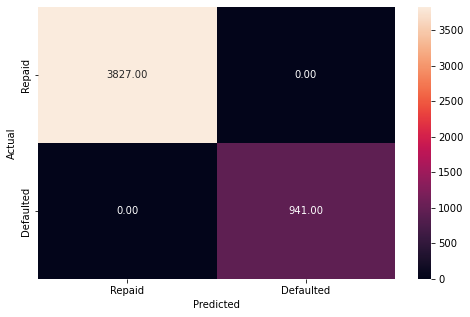

In [78]:
# Checking fit on training data for 80/20 split
y_pred_train2_20 = d_tree2_20.predict(X2_train20)

metrics_score(y2_train20, y_pred_train2_20)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       944
           1       0.69      0.60      0.65       248

    accuracy                           0.86      1192
   macro avg       0.80      0.77      0.78      1192
weighted avg       0.86      0.86      0.86      1192



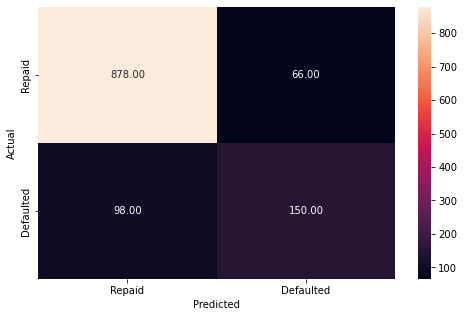

In [79]:
# Checking fit on testing data for 80/20 split
y_pred_test2_20 = d_tree2_20.predict(X2_test20)

metrics_score(y2_test20, y_pred_test2_20)

**Observations**: 
* The 80/20 train/test split results in the same precision score (0.69) compared to the 70/30 split, but a slightly lower recall score (0.60 vs. 0.62). 
* Overall the results are similar between these two data split ratios.
* The 70/30 split still results in the best recall score (0.62) of the methods tried to this point.

### SMOTE Analysis

* SMOTE = synthetic minority oversampling technique
* The data is imbalanced with 80% repayments and 20% loan defaults. 
* Weights have been introduced in the decision tree classification, although the model achieves similar recall values with and without weights.
* SMOTE analysis will balance the dataset by created synthetic minority class (default class) data points which may allow for higher recall and precision from the decision tree model.
* This will be attempted for the training data for data treatments 1 and 2.

In [80]:
# Create minority sampled dataset with SMOTE
sm1 = SMOTE(random_state=42)
X1_smo, y1_smo = sm1.fit_resample(X1_train, y1_train)

sm2 = SMOTE(random_state=42)
X2_smo, y2_smo = sm2.fit_resample(X2_train, y2_train)

sm3 = SMOTE(random_state=42)
X3_smo, y3_smo = sm3.fit_resample(X3_train, y3_train)

sm4 = SMOTE(random_state=42)
X4_smo, y4_smo = sm4.fit_resample(X4_train, y4_train)

In [81]:
X1_smo.shape

(6710, 18)

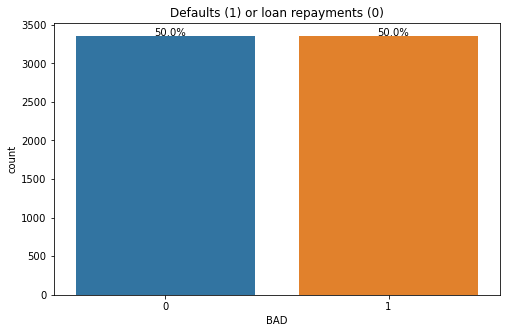

In [82]:
# Visualize results of SMOTE
perc_on_bar(y2_smo, bad_title)

MORTDUE = Mortgage Still Due
Skew : 0.65


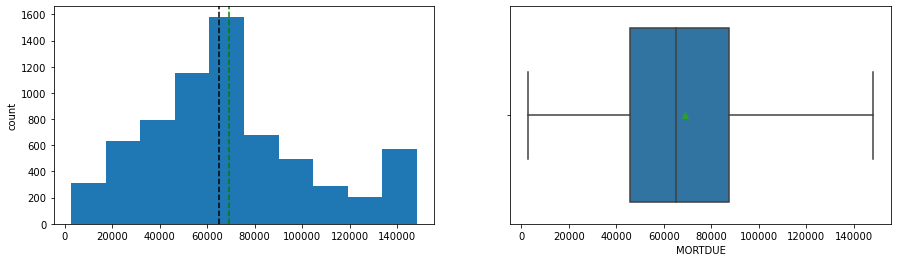

DEBTINC = debt-to-income ratio
Skew : -0.51


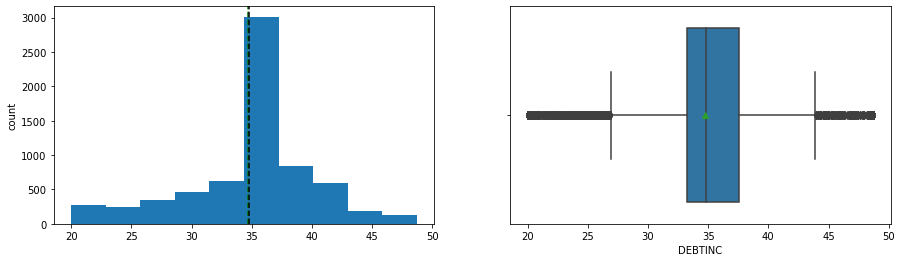

DEROG = Number of Derogatory reports
Skew : 0


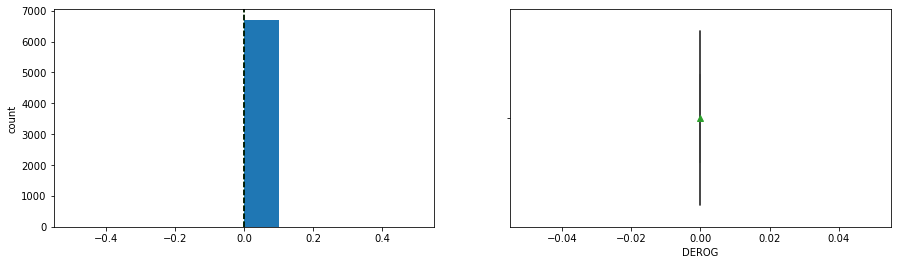

In [83]:
# Look at a couple of examples of numerical variables from SMOTE Analysis for data treatment 1
mortdue_name = "MORTDUE = Mortgage Still Due"

num_uni(X1_smo["MORTDUE"], mortdue_name)

debtinc_name = "DEBTINC = debt-to-income ratio"

num_uni(X1_smo["DEBTINC"], debtinc_name)

derog_name = "DEROG = Number of Derogatory reports"

num_uni(X1_smo["DEROG"], derog_name)

MORTDUE = Mortgage Still Due
Skew : 1.85


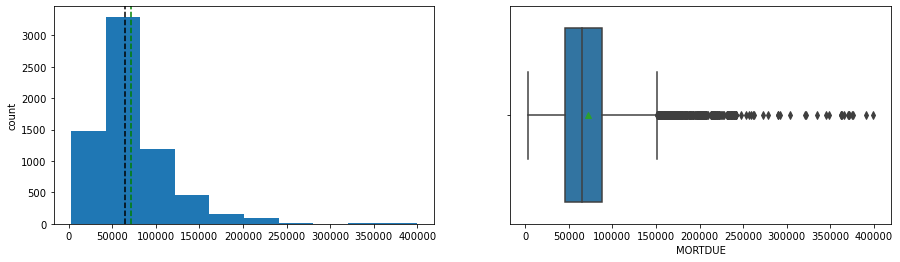

DEBTINC = debt-to-income ratio
Skew : 4.92


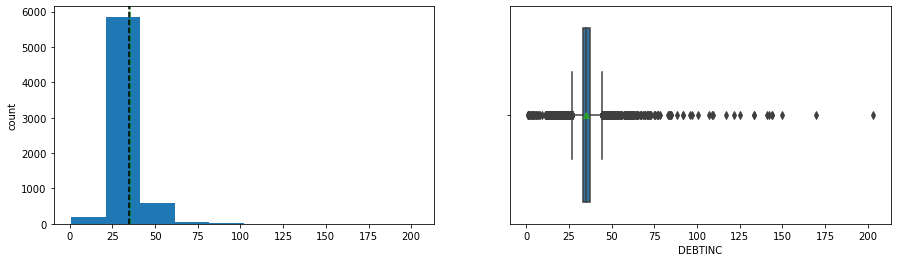

DEROG = Number of Derogatory reports
Skew : 3.96


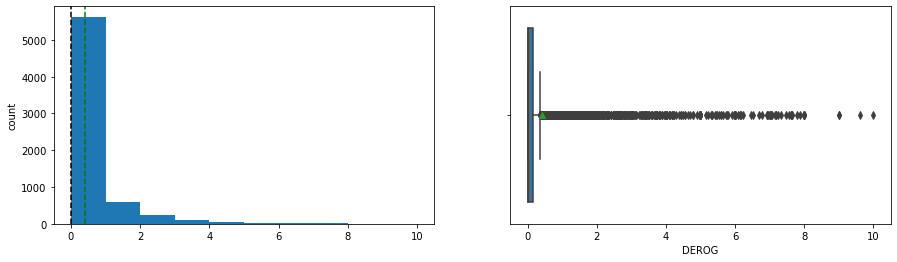

In [84]:
# Look at a couple of examples of numerical variables from SMOTE Analysis for data treatment 2
mortdue_name = "MORTDUE = Mortgage Still Due"

num_uni(X2_smo["MORTDUE"], mortdue_name)

debtinc_name = "DEBTINC = debt-to-income ratio"

num_uni(X2_smo["DEBTINC"], debtinc_name)

derog_name = "DEROG = Number of Derogatory reports"

num_uni(X2_smo["DEROG"], derog_name)

**Observations**:
* The outcome variable data has now been balanced 50/50 with 6710 entries.
* Outliers were removed from data treatment 1 initially, but some have been added back into features such as mortgage still due.
* There are many more outliers for data treatment 2, which is to be expected for features such as debt-to-income ratio and derogatory reports, as default outcomes tended to have higher values for both. 

In [85]:
# Fitting decision tree classifier on data treatment 1 with SMOTE analysis
d_tree1_smo =  DecisionTreeClassifier(random_state = 7)

d_tree1_smo.fit(X1_smo, y1_smo)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00      3355

    accuracy                           1.00      6710
   macro avg       1.00      1.00      1.00      6710
weighted avg       1.00      1.00      1.00      6710



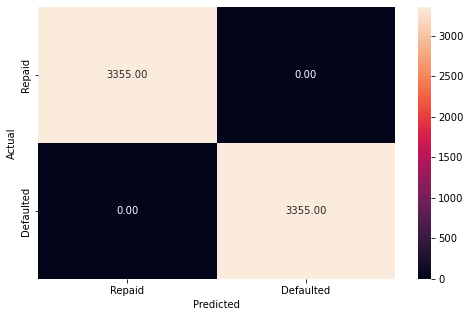

In [86]:
# Checking fit on training data treatment 1 with SMOTE
y_pred_train1_smo = d_tree1_smo.predict(X1_smo)

metrics_score(y1_smo, y_pred_train1_smo)

**Observations**:
* The decision tree model appears to still be overfitting the training data after SMOTE analysis.

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1416
           1       0.62      0.62      0.62       372

    accuracy                           0.84      1788
   macro avg       0.76      0.76      0.76      1788
weighted avg       0.84      0.84      0.84      1788



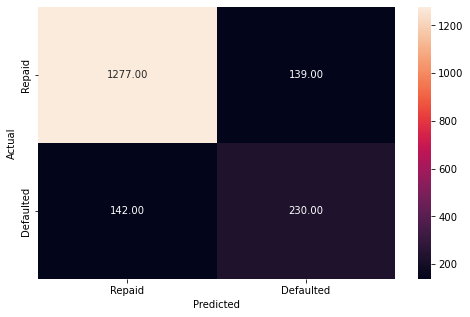

In [87]:
# Checking fit on training data treatment 1 with SMOTE
y_pred_test1_smo = d_tree1_smo.predict(X1_test)

metrics_score(y1_test, y_pred_test1_smo)

**Observations**:
* The training data is still being overfit after SMOTE analysis.
* The recall score is slightly higher for data treatment 1 after SMOTE (0.62 vs. 0.59).
* Tuning would be needed to improve model.

In [88]:
# Fitting decision tree classifier on data treatment 2 with SMOTE analysis
d_tree2_smo =  DecisionTreeClassifier(random_state = 7)

d_tree2_smo.fit(X2_smo, y2_smo)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00      3355

    accuracy                           1.00      6710
   macro avg       1.00      1.00      1.00      6710
weighted avg       1.00      1.00      1.00      6710



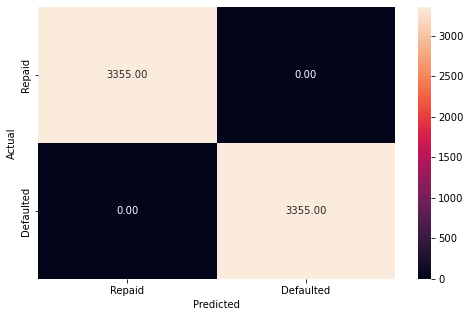

In [89]:
# Checking fit on training data treatment 2 with SMOTE
y_pred_train2_smo = d_tree2_smo.predict(X2_smo)

metrics_score(y2_smo, y_pred_train2_smo)

**Observations**:
* The decision tree model appears to still be overfitting the training data after SMOTE analysis for data treatment 2 as well.

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1416
           1       0.69      0.64      0.66       372

    accuracy                           0.87      1788
   macro avg       0.80      0.78      0.79      1788
weighted avg       0.86      0.87      0.86      1788



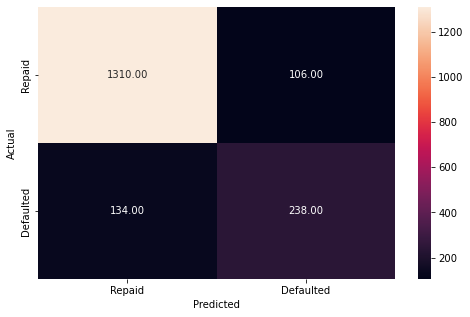

In [90]:
# Checking fit on training data treatment 2 with SMOTE
y_pred_test2_smo = d_tree2_smo.predict(X2_test)

metrics_score(y2_test, y_pred_test2_smo)

**Observations**:
* The training data is still being overfit after SMOTE analysis.
* The recall score is slightly higher for data treatment 1 after SMOTE (0.64 vs. 0.62).

In [91]:
# Fitting decision tree classifier on data treatment 2 with SMOTE analysis
d_tree3_smo =  DecisionTreeClassifier(random_state = 7)

d_tree3_smo.fit(X3_smo, y3_smo)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00      3355

    accuracy                           1.00      6710
   macro avg       1.00      1.00      1.00      6710
weighted avg       1.00      1.00      1.00      6710



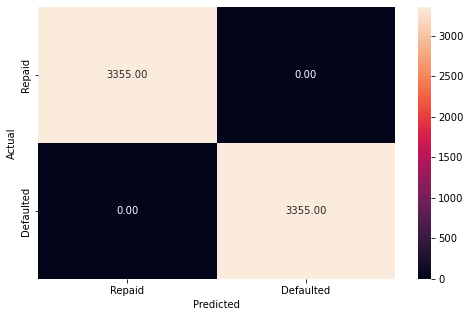

In [92]:
# Checking fit on training data treatment 2 with SMOTE
y_pred_train3_smo = d_tree3_smo.predict(X3_smo)

metrics_score(y3_smo, y_pred_train3_smo)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1416
           1       0.68      0.65      0.67       372

    accuracy                           0.86      1788
   macro avg       0.80      0.79      0.79      1788
weighted avg       0.86      0.86      0.86      1788



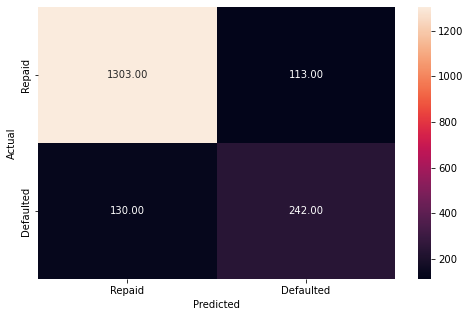

In [93]:
# Checking fit on training data treatment 2 with SMOTE
y_pred_test3_smo = d_tree3_smo.predict(X3_test)

metrics_score(y3_test, y_pred_test3_smo)

**Observations**:
* The training data is still being overfit after SMOTE analysis.
* The recall score is slightly higher for data treatment 1 after SMOTE (0.65 vs. 0.60).
* This recall score (0.65) is the highest achieved so far, and the data treatment 3 with SMOTE analysis will be used for tuning the decision tree.

In [94]:
# Fitting decision tree classifier on data treatment 1 with SMOTE analysis
d_tree4_smo =  DecisionTreeClassifier(random_state = 7)

d_tree4_smo.fit(X4_smo, y4_smo)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00      3355

    accuracy                           1.00      6710
   macro avg       1.00      1.00      1.00      6710
weighted avg       1.00      1.00      1.00      6710



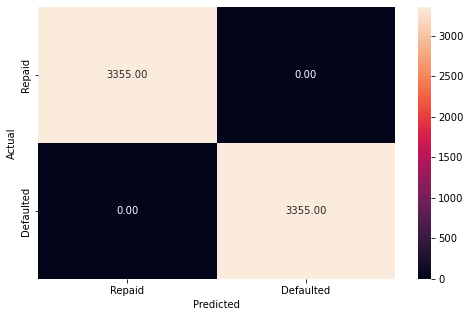

In [95]:
# Checking fit on training data treatment 2 with SMOTE
y_pred_train4_smo = d_tree4_smo.predict(X4_smo)

metrics_score(y4_smo, y_pred_train4_smo)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1416
           1       0.66      0.66      0.66       372

    accuracy                           0.86      1788
   macro avg       0.79      0.78      0.79      1788
weighted avg       0.86      0.86      0.86      1788



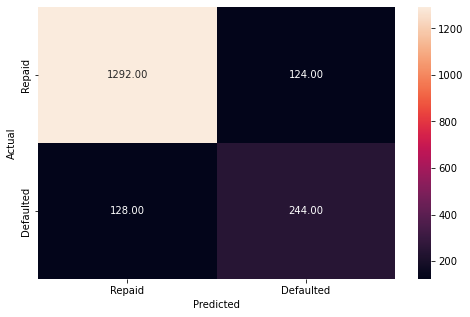

In [96]:
# Checking fit on training data treatment 2 with SMOTE
y_pred_test4_smo = d_tree4_smo.predict(X4_test)

metrics_score(y4_test, y_pred_test4_smo)

### Tuning the Decision Tree

* The SMOTE-treated dataset will be passed.
* To tune the decision tree, different hyperparameters can be passed, and the best parameters can be found.
* Max_depth is the maximum depth of the tree.
* Criterion is either gini or entropy, these are measurements of the quality of a split based on purity and information gain.
* Min_samples_leaf is the minimum number of samples required to be a leaf node.

In [97]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25, 30]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X2_smo, y2_smo)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X2_smo, y2_smo)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=7)

**Observations**:
* The tuned decision tree has a max depth of 8, and 5 minimum samples per leaf. 
* The metrics on the training and testing data need to be checked.

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3355
           1       0.93      0.87      0.90      3355

    accuracy                           0.90      6710
   macro avg       0.91      0.90      0.90      6710
weighted avg       0.91      0.90      0.90      6710



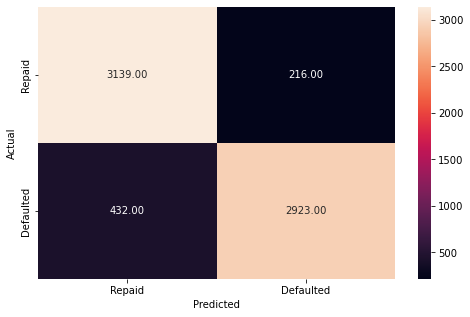

In [98]:
# Checking fit on training data for the tuned tree
y_pred_train_tuned = d_tree_tuned.predict(X2_smo)

metrics_score(y2_smo, y_pred_train_tuned)

**Observations**: 
* The tuned decision may still be overfitting the training data (though the test data must be checked).
* Recall for class 1 is fairly high (0.87) for the tuned model. 

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1416
           1       0.70      0.61      0.65       372

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



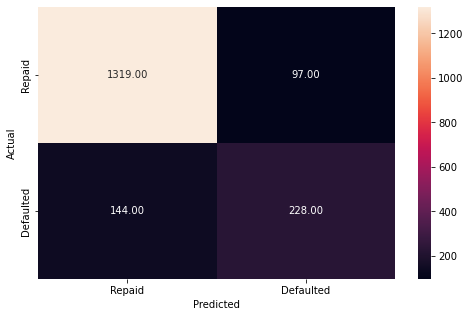

In [99]:
# Checking fit on training data for the tuned tree
y_pred_test_tuned = d_tree_tuned.predict(X2_test)

metrics_score(y2_test, y_pred_test_tuned)

##### **Observations**: 
* The tuned decision tree is still overfitting the training data and recall is currently worse compared to the non-tuned tree.
* Recall for class 1 test data (0.61) is lower compared to the fit on the training data (0.87). 

### Second Attempt at Tuning Decision Tree with more Hyperparameters

In [100]:
# Choose the type of classifier 
d_tree_tuned2 = DecisionTreeClassifier(random_state = 7)

# Grid of parameters to choose from
parameters = {'max_depth': [4, 5, 6],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': np.arange(2, 10),
              'splitter': ['best', 'random'],
              'max_features' : [0.8, 0.9, 1.0],
              'min_samples_leaf': [15, 20, 25]}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned2, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X2_smo, y2_smo)

# Set the classifier to the best combination of parameters
d_tree_tuned2 = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned2.fit(X2_smo, y2_smo)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       min_samples_leaf=25, random_state=7)

**Observations**:
* Max depth is 6 and minimum samples per leaf is 25.

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3355
           1       0.85      0.83      0.84      3355

    accuracy                           0.85      6710
   macro avg       0.85      0.85      0.85      6710
weighted avg       0.85      0.85      0.85      6710



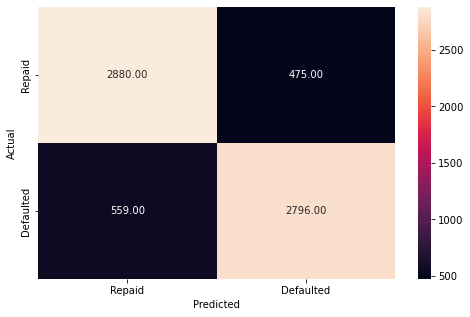

In [101]:
# Checking fit on training data for the tuned tree
y_pred_train_tuned2 = d_tree_tuned2.predict(X2_smo)

metrics_score(y2_smo, y_pred_train_tuned2)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1416
           1       0.58      0.77      0.66       372

    accuracy                           0.84      1788
   macro avg       0.76      0.81      0.78      1788
weighted avg       0.86      0.84      0.85      1788



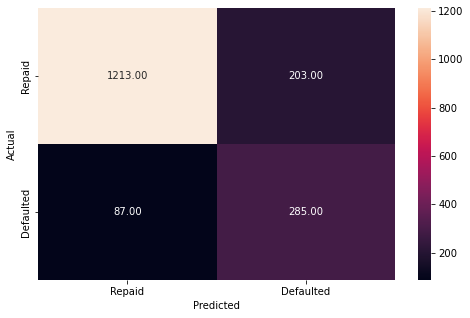

In [102]:
# Checking fit on testing data for the tuned tree
y_pred_test_tuned2 = d_tree_tuned2.predict(X2_test)

metrics_score(y2_test, y_pred_test_tuned2)

**Observations**:
* The second attempt at tuning resulted in less overfitting and a much higher recall score for the test data (0.77). 
* This has come at the cost of precision for the test data (only 0.58) as there are more false positives now with more clients predicted to default who actually repaid their loans. 

### Visualizing the tuned tree

* The two tuned decision trees were not different from each other in terms of accuracy, precision, or recall, and therefore the first tuned tree will be visualized below.

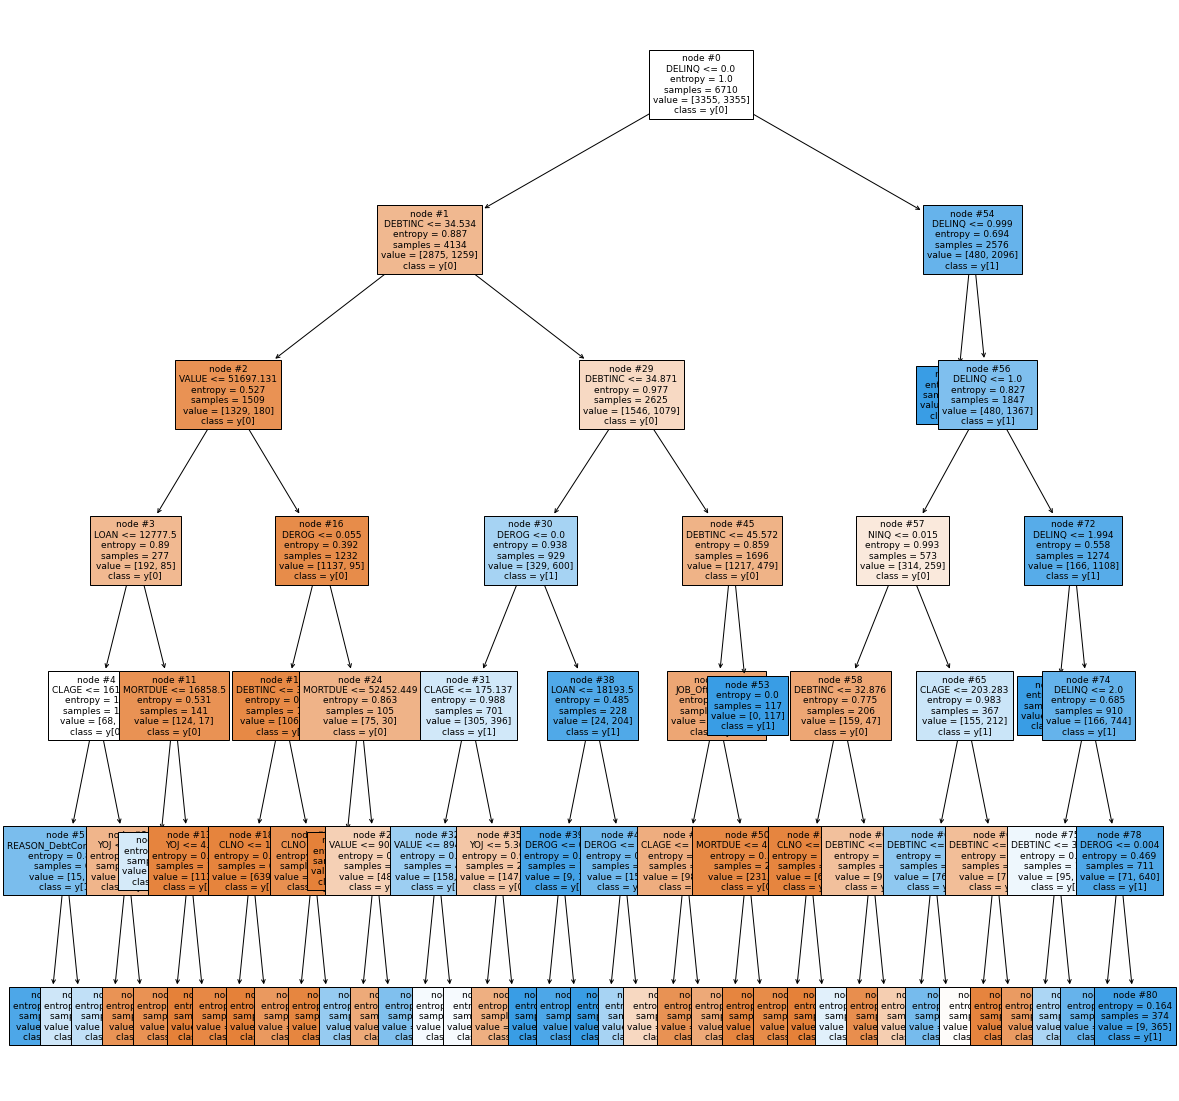

In [103]:
# Visualize the tuned decision tree
features = list(X2.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned2, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Observations**:
* There are some features we can pick out from the tree, and the feature importances will also be plotted below.
* Number of deliquent credit lines is the root node, and is also found on after the first and second branches on the right side, it is clearly an important feature of the data for determining loan defaults.
* Debt-to-income ratio is also found in multiple nodes. 
* There are other features used in the tree, including number of derogatory reports, age of oldest credit line, and value of home property.

### Plotting feature importances

In [104]:
# Importance of features in the tuned tree building

print (pd.DataFrame(d_tree_tuned2.feature_importances_, columns = ["Imp"], index = X2_smo.columns).sort_values(by = 'Imp', ascending = False))

                     Imp
DELINQ          0.542399
DEBTINC         0.255244
CLAGE           0.057736
DEROG           0.044845
VALUE           0.025802
MORTDUE         0.016010
NINQ            0.013676
LOAN            0.012413
JOB_Office      0.012392
CLNO            0.009234
YOJ             0.008296
REASON_DebtCon  0.001953
REASON_HomeImp  0.000000
JOB_Mgr         0.000000
JOB_Other       0.000000
JOB_ProfExe     0.000000
JOB_Sales       0.000000
JOB_Self        0.000000


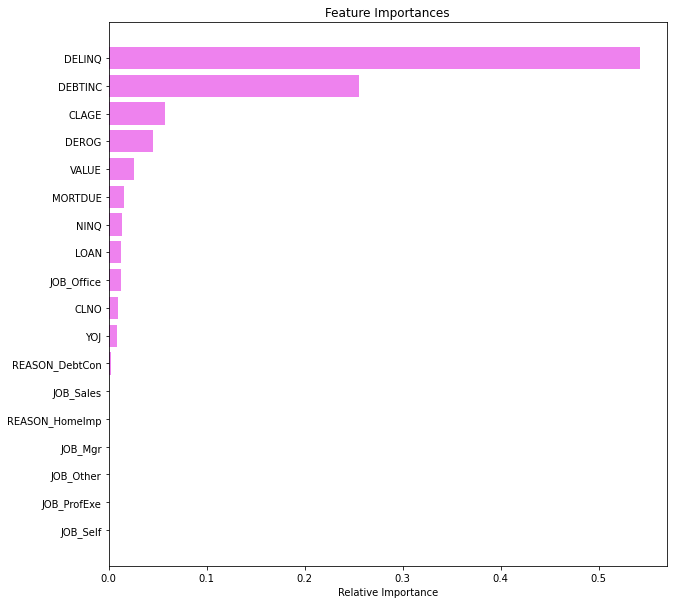

In [105]:
# Plotting the feature importances for the tuned decision tree
importances = d_tree_tuned2.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations**:
* As a reminder, this dataset was treated by replacing null values with the median for numerical columns and the mode for categorical columns. Outliers were left in the dataset. Then SMOTE analysis was conducted to balance the dataset.
* Number of deliquent credit lines and debt-to-income ratio are the most important features of the treated dataset, eclipsing all other features. 
* Age of oldest credit line, number of derogatory reports, and value of property are also important. 
* Reason for loan application and most job types of the client are not at all important, despite some of the differences in average default rates for different jobs based on the data exploration. The slightly higher default rates for self-employed clients and salespeople in the dataset did have higher standard deviations as well, because their were fewer clients with those jobs in the dataset to begin with. 
* It is important to note that ~21% of the data was missing for debt-to-income ratio and that the null values were filled with the median value for this column. If it is possible for the bank to collect data on a client's debt-to-income ratio for every loan applicant (or nearly every loan applicant) that would aid the decision making process for this model.

### Building Random Forest Models

**Data Treatment 1 Random Forest**

In [106]:
# Fitting the random forest tree classifier on the training data for df_treat1
rf_estimator1 = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator1.fit(X1_train, y1_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



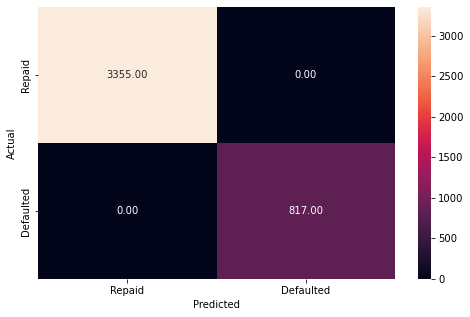

In [107]:
# Checking performance on the training data
y_rf_train1 = rf_estimator1.predict(X1_train)

metrics_score(y1_train, y_rf_train1)

**Observations**:
* Overfitting is again observed on the training data for the initial Random Forest model with 100% accuracy, precision, and recall.

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1416
           1       0.86      0.60      0.71       372

    accuracy                           0.90      1788
   macro avg       0.88      0.79      0.82      1788
weighted avg       0.90      0.90      0.89      1788



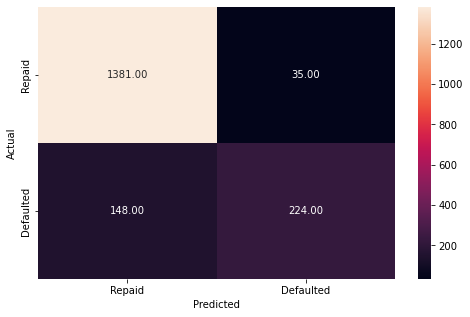

In [108]:
# Checking performance on the testing data
y_rf_test1 = rf_estimator1.predict(X1_test)

metrics_score(y1_test, y_rf_test1)

**Observations**:
* The model is overfitting the training data. 
* Precision and recall are high for class 0, and precision is relatively high for class 1 (0.86), however recall for class 1 is low (0.60), and this is the most important metric for the loan default problem. 
* There are too many cases where the model predicts the client will repay the loan, but the client actually defaulted on the loan. 

**Data Treatment 2 Random Forest**

In [109]:
# Fitting the random forest tree classifier on the training data for df_treat2
rf_estimator2 = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator2.fit(X2_train, y2_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



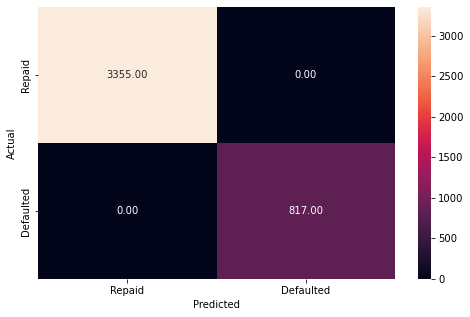

In [110]:
# Checking performance on the training data
y_rf_train2 = rf_estimator2.predict(X2_train)

metrics_score(y2_train, y_rf_train2)

**Observations**:
* Once again, overfitting is observed on the training data for the Random Forest model with 100% accuracy, precision, and recall for data treatment 2.

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.91      0.66      0.77       372

    accuracy                           0.92      1788
   macro avg       0.91      0.82      0.86      1788
weighted avg       0.92      0.92      0.91      1788



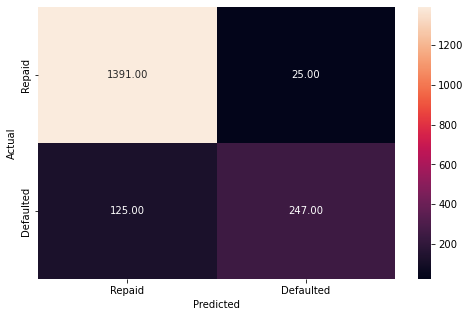

In [111]:
# Checking performance on the testing data
y_rf_test2 = rf_estimator2.predict(X2_test)

metrics_score(y2_test, y_rf_test2)

**Observations**:
* The model is overfitting the training data, but it is not as poor a fit as for the first data treatment.
* Precision and recall are high for class 0, and precision is high for class 1 (0.91), however recall for class 1 is still low (0.66) and needs to be increased
* This is still a better starting point compared to the first decision tree with data treatment 2, which had a recall of 0.62, or compared to the random forest model with data treatment 1 (recall = 0.60).

**Data Treatment 3 Random Forest**

In [112]:
# Fitting the random forest tree classifier on the training data for df_treat3
rf_estimator3 = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator3.fit(X3_train, y3_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



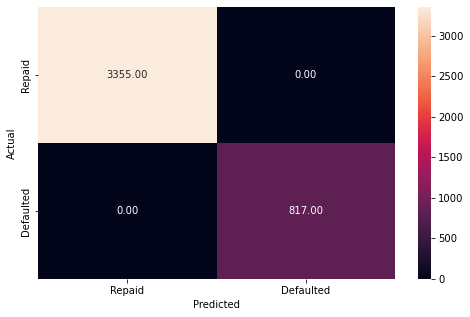

In [113]:
# Checking performance on the training data
y_rf_train3 = rf_estimator3.predict(X3_train)

metrics_score(y3_train, y_rf_train3)

**Observations**:
* Once again, overfitting is observed on the training data for the Random Forest model with 100% accuracy, precision, and recall for data treatment 3.

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.90      0.67      0.77       372

    accuracy                           0.92      1788
   macro avg       0.91      0.83      0.86      1788
weighted avg       0.92      0.92      0.91      1788



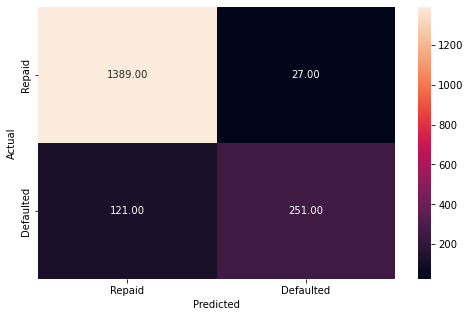

In [114]:
# Checking performance on the testing data
y_rf_test3 = rf_estimator3.predict(X3_test)

metrics_score(y3_test, y_rf_test3)

**Observations**:
* The model is still overfitting the training data.
* Precision and recall are high for class 0, and precision is high for class 1 (0.90), however recall for class 1 is still low (0.67) and needs to be increased
* The metrics for the model with data treatment 3 are very similar to the metrics with data treatment 2, and the recall score is actually slightly higher for treatment 3 compared to treatment 2 (0.67 vs. 0.66). This is slightly surprising, as the opposite was true for the initial decision tree model, although in both cases treatments 2 and 3 perform similarly.

**Data Treatment 4 Random Forest**

In [115]:
# Fitting the random forest tree classifier on the training data for df_treat2
rf_estimator4 = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator4.fit(X4_train, y4_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



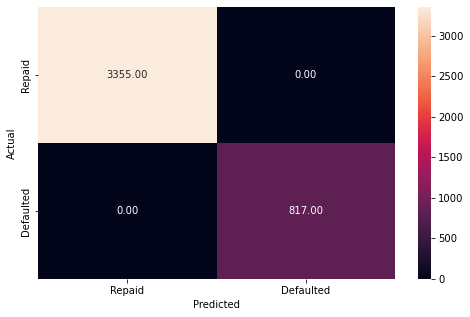

In [116]:
# Checking performance on the training data
y_rf_train4 = rf_estimator4.predict(X4_train)

metrics_score(y4_train, y_rf_train4)

**Observations**:
* Once again, overfitting is observed on the training data for the Random Forest model with 100% accuracy, precision, and recall for data treatment 4.

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.89      0.67      0.77       372

    accuracy                           0.91      1788
   macro avg       0.91      0.83      0.86      1788
weighted avg       0.91      0.91      0.91      1788



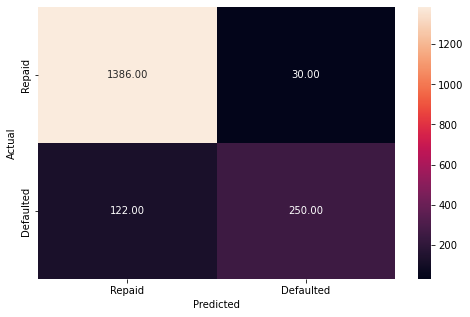

In [117]:
# Checking performance on the testing data
y_rf_test4 = rf_estimator4.predict(X4_test)

metrics_score(y4_test, y_rf_test4)

**Observations**:
* The model is still overfitting the training data.
* Precision and recall are high for class 0, and precision is high for class 1 (0.89), however recall for class 1 is still low (0.67) and needs to be increased.
* The performance of this model on data treatment 4 is very similar to data treatments 2 and 3, and all are better than data treatment 1. This indicates that the outliers for DEROG and DELINQ should not be completely adjusted to the median, as all the data for these features are then lost.

**Data Treatment 5 Random Forest**

In [118]:
# Fitting the random forest tree classifier on the training data for df_treat5
rf_estimator5 = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator5.fit(X5_train, y5_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2151
           1       1.00      1.00      1.00       203

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354



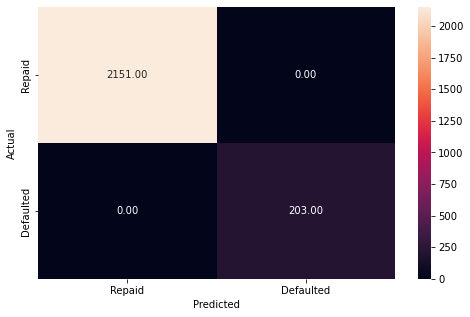

In [119]:
# Checking performance on the training data
y_rf_train5 = rf_estimator5.predict(X5_train)

metrics_score(y5_train, y_rf_train5)

**Observations**:
* Once again, overfitting is observed on the training data for the Random Forest model with 100% accuracy, precision, and recall for data treatment 5.

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       913
           1       1.00      0.28      0.44        97

    accuracy                           0.93      1010
   macro avg       0.96      0.64      0.70      1010
weighted avg       0.94      0.93      0.91      1010



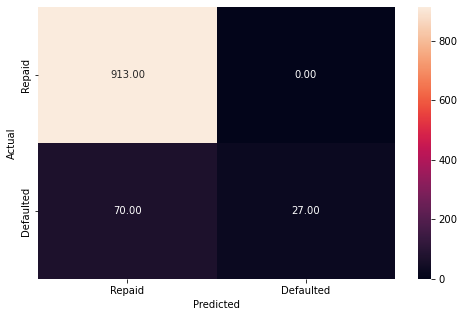

In [120]:
# Checking performance on the testing data
y_rf_test5 = rf_estimator5.predict(X5_test)

metrics_score(y5_test, y_rf_test5)

**Observations**:
* The model is overfitting the training data for data treatment 5, and the recall score is very poor for this data treatment, only 0.28. 
* There are two few entries in the dataset where clients defaulted, and therefore the random forest is predicting that almost every one will repay their loan, and missing 72% of clients who default on their loans. 


### Overall Observations: Initial Random Forest model
* The random forest model resulted in overfitting of the training data for each of the differently treated datasets with 100% recall, accuracy, and precision.
* The random forest model with data treatments 2, 3, and 4 resulted in recall scores of 0.66 and 0.67, which need to be improved, but are higher compared to the initial decision tree models (0.59 - 0.62). 
* Random forest model with data treatment 5 (removing all entries will null values) resulted in a very low recall score - 0.28. 
* **Data treatment 2 will be used for random forest models going forward** - this data was treated by filling null values with the median for numerical variables and the mode for categorical variables, and not treating the outliers. Data treatments 2, 3, and 4 essentially achieved the same recall and precision scores, and therefore datatreatment 2 will be used as it can more directly be compared with the tuned decision tree model.

#### Adding class weights to random forest model

In [121]:
# Fitting random forest classifier on data treatment 2 with class weights
rf_estimator2_cw =  RandomForestClassifier(random_state = 7, criterion = "entropy", class_weight = {0: 0.2, 1: 0.8})

rf_estimator2_cw.fit(X2_train, y2_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



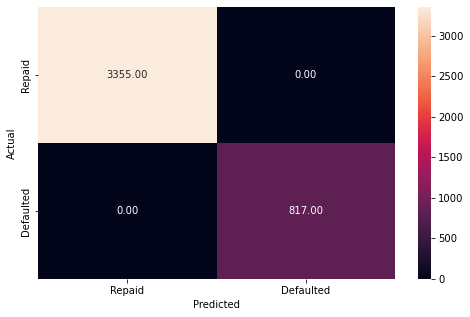

In [122]:
# Checking performance on the training data
y_rf_train2_cw = rf_estimator2_cw.predict(X2_train)

metrics_score(y2_train, y_rf_train2_cw)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1416
           1       0.90      0.64      0.75       372

    accuracy                           0.91      1788
   macro avg       0.91      0.81      0.85      1788
weighted avg       0.91      0.91      0.90      1788



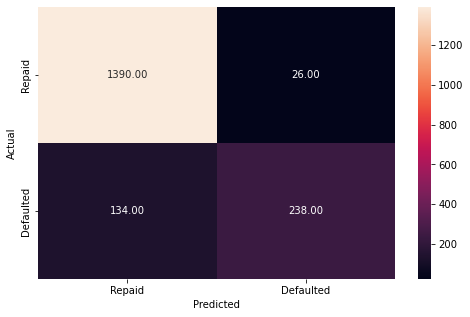

In [123]:
# Checking performance on the testing data
y_rf_test2_cw = rf_estimator2_cw.predict(X2_test)

metrics_score(y2_test, y_rf_test2_cw)

**Observations**:
* The random forest model with weights performs slightly less well compared to the model without weights. 
* The recall score for the model with class weights is 0.64 compared to a recall score of 0.66 for the model without weights.


#### Checking other train/test data splitting ratios for random forests

In [124]:
# Fitting random forest classifier on data treatment 2 75/25 train/test split
rf_estimator2_25 =  RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator2_25.fit(X2_train25, y2_train25)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3600
           1       1.00      1.00      1.00       870

    accuracy                           1.00      4470
   macro avg       1.00      1.00      1.00      4470
weighted avg       1.00      1.00      1.00      4470



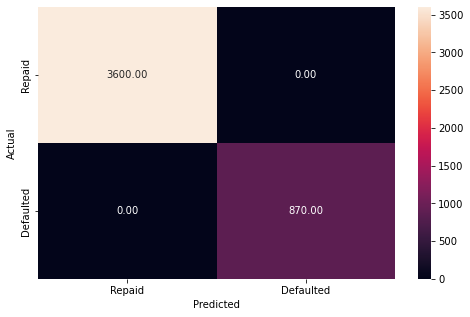

In [125]:
# Checking performance on the training data
y_rf_train2_25 = rf_estimator2_25.predict(X2_train25)

metrics_score(y2_train25, y_rf_train2_25)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1171
           1       0.91      0.67      0.77       319

    accuracy                           0.92      1490
   macro avg       0.91      0.83      0.86      1490
weighted avg       0.92      0.92      0.91      1490



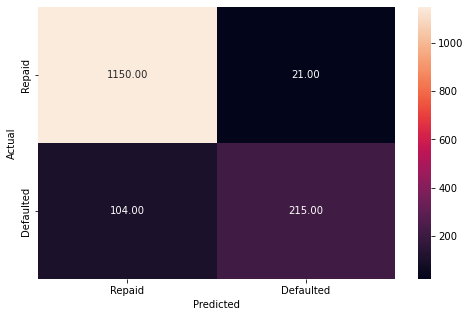

In [126]:
# Checking performance on the testing data
y_rf_test2_25 = rf_estimator2_25.predict(X2_test25)

metrics_score(y2_test25, y_rf_test2_25)

**Observations**:
* The 75/25 test split for the random forest performs similarly to the 70/30 test split, although the recall score is slightly higher (0.67 vs. 0.66).
* Nevertheless, there is not a large difference between these two train/test splits

In [127]:
# Fitting random forest classifier on data treatment 2 80/20 train/test split
rf_estimator2_20 =  RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator2_20.fit(X2_train20, y2_train20)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



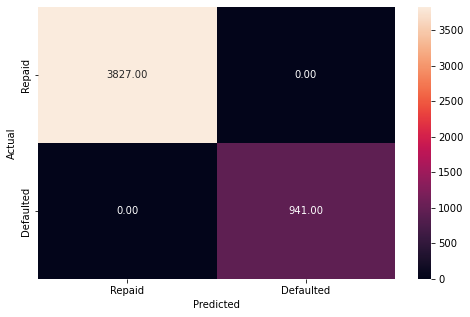

In [128]:
# Checking performance on the training data
y_rf_train2_20 = rf_estimator2_20.predict(X2_train20)

metrics_score(y2_train20, y_rf_train2_20)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       944
           1       0.91      0.68      0.78       248

    accuracy                           0.92      1192
   macro avg       0.92      0.83      0.86      1192
weighted avg       0.92      0.92      0.91      1192



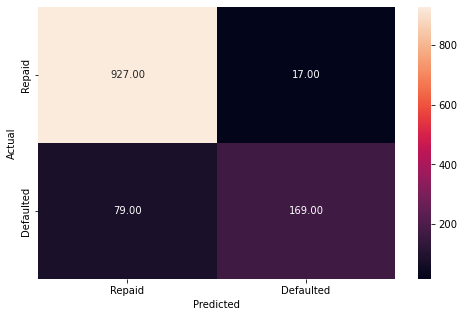

In [129]:
# Checking performance on the testing data
y_rf_test2_20 = rf_estimator2_20.predict(X2_test20)

metrics_score(y2_test20, y_rf_test2_20)

**Observations**:
* Again, the 80/20 test split for the random forest performs similarly to the 75/25 and 70/30 test splits, although the recall score is slightly higher (0.68 vs. 0.67/0.66).
* This is a different result from the decision tree model where the 70/30 split gave the highest recall score.

### Random Forest Models with SMOTE Analysis

In [130]:
# Fitting the random forest tree classifier on the training data for df_treat1 with SMOTE
rf_estimator1_smo = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator1_smo.fit(X1_smo, y1_smo)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00      3355

    accuracy                           1.00      6710
   macro avg       1.00      1.00      1.00      6710
weighted avg       1.00      1.00      1.00      6710



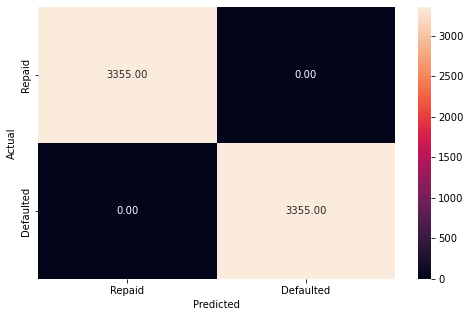

In [131]:
# Checking performance on the training data
y_rf_train1_smo = rf_estimator1_smo.predict(X1_smo)

metrics_score(y1_smo, y_rf_train1_smo)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1416
           1       0.84      0.72      0.77       372

    accuracy                           0.91      1788
   macro avg       0.88      0.84      0.86      1788
weighted avg       0.91      0.91      0.91      1788



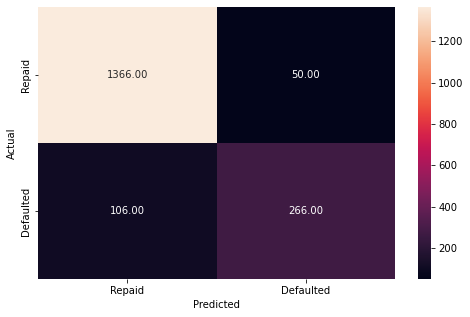

In [132]:
# Checking performance on the testing data
y_rf_test1_smo = rf_estimator1_smo.predict(X1_test)

metrics_score(y1_test, y_rf_test1_smo)

**Observations**: 
* The training data is still being overfit with the random forest model with SMOTE for data treatment 1, but the recall score is much higher for the test data (0.72 vs. 0.60).

In [133]:
# Fitting the random forest tree classifier on the training data for df_treat2 with SMOTE
rf_estimator2_smo = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator2_smo.fit(X2_smo, y2_smo)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00      3355

    accuracy                           1.00      6710
   macro avg       1.00      1.00      1.00      6710
weighted avg       1.00      1.00      1.00      6710



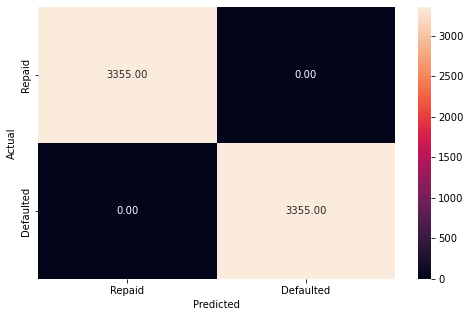

In [134]:
# Checking performance on the training data
y_rf_train2_smo = rf_estimator2_smo.predict(X2_smo)

metrics_score(y2_smo, y_rf_train2_smo)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1416
           1       0.92      0.77      0.84       372

    accuracy                           0.94      1788
   macro avg       0.93      0.88      0.90      1788
weighted avg       0.94      0.94      0.94      1788



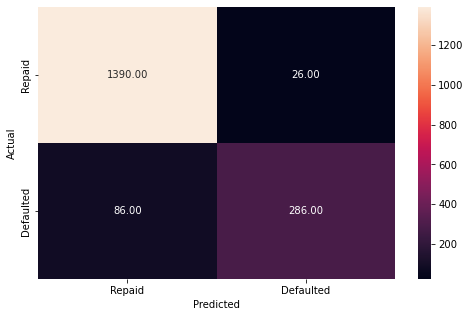

In [135]:
# Checking performance on the testing data
y_rf_test2_smo = rf_estimator2_smo.predict(X2_test)

metrics_score(y2_test, y_rf_test2_smo)

**Observations**: 
* The training data is still being overfit with the random forest model with SMOTE for data treatment 2, but the recall score is much higher for the test data (0.77 vs. 0.64).

In [136]:
# Fitting the random forest tree classifier on the training data for df_treat3 with SMOTE
rf_estimator3_smo = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator3_smo.fit(X3_smo, y3_smo)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00      3355

    accuracy                           1.00      6710
   macro avg       1.00      1.00      1.00      6710
weighted avg       1.00      1.00      1.00      6710



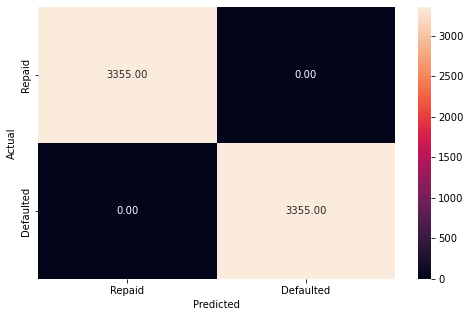

In [137]:
# Checking performance on the training data
y_rf_train3_smo = rf_estimator3_smo.predict(X3_smo)

metrics_score(y3_smo, y_rf_train3_smo)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1416
           1       0.91      0.77      0.83       372

    accuracy                           0.94      1788
   macro avg       0.92      0.88      0.90      1788
weighted avg       0.94      0.94      0.93      1788



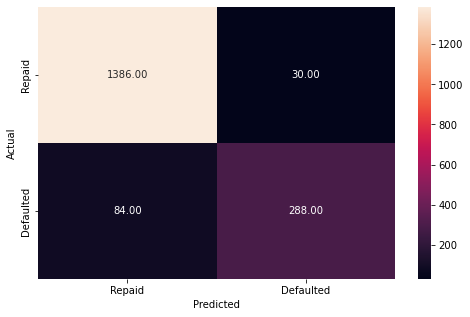

In [138]:
# Checking performance on the testing data
y_rf_test3_smo = rf_estimator3_smo.predict(X3_test)

metrics_score(y3_test, y_rf_test3_smo)

**Observations**: 
* The training data is still being overfit with the random forest model with SMOTE for data treatment 2, but the recall score is much higher for the test data (0.77 vs. 0.67).

### Tuning the Random Forest Model

* To tune a random forest, different hyperparameters can be passed, and the best values for each parameter can be found.
* n_estimators is the number of trees in the forest
* Max_depth is the maximum depth of the trees
* Max_features is the number of features to consider when looking for the best split

In [139]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [4, 5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X2_smo, y2_smo)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [140]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X2_smo, y2_smo)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=1,
                       n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3355
           1       0.94      0.88      0.91      3355

    accuracy                           0.91      6710
   macro avg       0.91      0.91      0.91      6710
weighted avg       0.91      0.91      0.91      6710



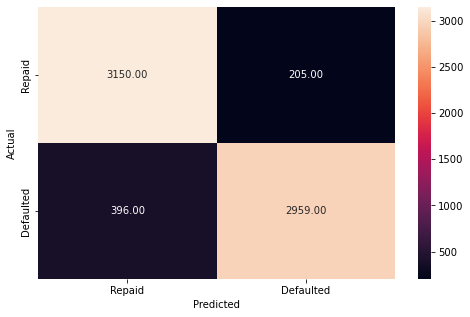

In [141]:
# Checking performance on the training data
y_tune_train = rf_estimator_tuned.predict(X2_smo)

metrics_score(y2_smo, y_tune_train)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1416
           1       0.71      0.60      0.65       372

    accuracy                           0.87      1788
   macro avg       0.81      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



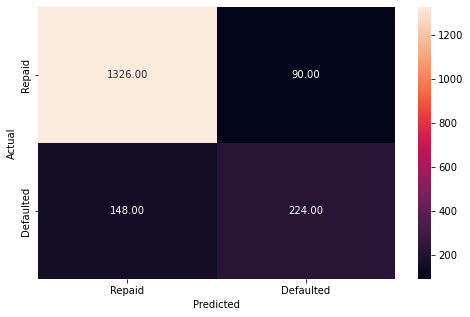

In [142]:
# Checking performance on the testing data
y_tune_test = rf_estimator_tuned.predict(X2_test)

metrics_score(y2_test, y_tune_test)

**Observations**:
* The model is still overfitting the training data.
* However the recall score is lower for the testing data (0.60 vs. 0.88) and lower compared to the non-tuned random forest.
* Tuning should be attempted again to boost the recall score.

### Second Attempt at Tuning Random Forest with more Hyperparameters

In [143]:
# Choose the type of classifier
rf_estimator_tuned2 = RandomForestClassifier(random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "criterion" : ["entropy", "gini"],
    "max_depth": [6, 7],
    "max_features": [0.8, 0.9],
    "min_samples_leaf": [20, 25],
    "max_samples": [0.9, 1.0]}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned2, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X2_smo, y2_smo)

# Set the classifier to the best combination of parameters
rf_estimator_tuned2 = grid_obj.best_estimator_
                     
# Fitting the best algorithm to the training data
rf_estimator_tuned2.fit(X2_smo, y2_smo)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       max_samples=0.9, min_samples_leaf=25, n_estimators=110,
                       random_state=7)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      3355
           1       0.91      0.85      0.88      3355

    accuracy                           0.88      6710
   macro avg       0.88      0.88      0.88      6710
weighted avg       0.88      0.88      0.88      6710



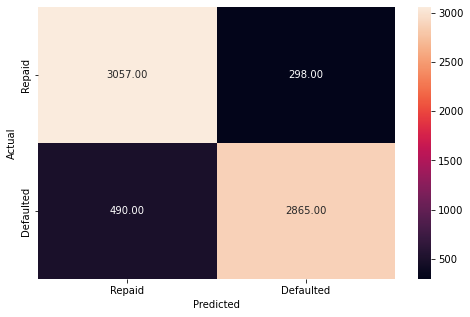

In [144]:
# Checking performance on the training data
y_tune_train2 = rf_estimator_tuned2.predict(X2_smo)

metrics_score(y2_smo, y_tune_train2)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1416
           1       0.69      0.71      0.70       372

    accuracy                           0.87      1788
   macro avg       0.80      0.81      0.81      1788
weighted avg       0.87      0.87      0.87      1788



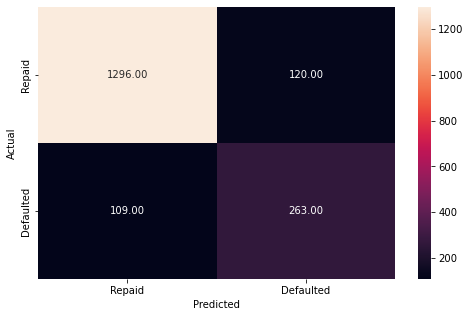

In [145]:
# Checking performance on the testing data
y_tune_test2 = rf_estimator_tuned2.predict(X2_test)

metrics_score(y2_test, y_tune_test2)

**Observations**:
* The tuned model is still  overfitting the training data as the recall score for the testing data is lower than the training data (0.71 vs. 0.85).
* Interestingly, this tuned model has a lower recall score than the non-tuned random forest model (0.71 vs. 0.77) despite the non-tuned model clearly overfitting the training data.
* This second tuning still scores higher on recall for both the training data and testing data. 
* The importance of different features will be visualized.

### Plotting feature importances for Random Forest

In [146]:
# Importance of features in the forest building

print (pd.DataFrame(rf_estimator2_smo.feature_importances_, columns = ["Imp"], index = X2_smo.columns).sort_values(by = 'Imp', ascending = False))

                     Imp
DELINQ          0.173612
DEBTINC         0.134882
DEROG           0.089480
CLAGE           0.080422
NINQ            0.079458
VALUE           0.073072
MORTDUE         0.069211
LOAN            0.065517
CLNO            0.062063
YOJ             0.059764
JOB_Office      0.021742
REASON_DebtCon  0.019486
REASON_HomeImp  0.018214
JOB_Other       0.017133
JOB_ProfExe     0.016758
JOB_Mgr         0.012720
JOB_Sales       0.003710
JOB_Self        0.002757


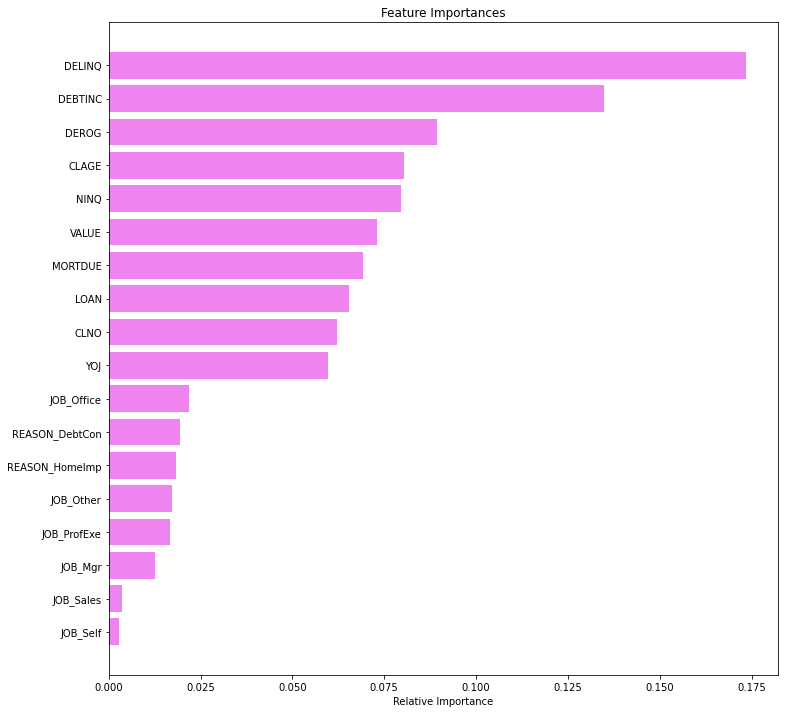

In [147]:
# Plot feature importances for the second tuned Random Forest model
importances = rf_estimator2_smo.feature_importances_

indices = np.argsort(importances)

feature_names = list(X2.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations**:
* There are more features considered important in the random forest model compared to the tuned decision tree model, indeed all features are included in the random forest model.
* Number of deliquent reports and debt-to-income ratio are the most important features again. 
* Other important features include derogatory reports, number of recent inquiries, age of oldest credit line, and value of home property.

### Building a Logistic Regression Model

#### Scaling Data for Logistic Regression

In [148]:
# Scaling the data
sc = StandardScaler()

X1_sc = sc.fit_transform(X1)
X1_sc = pd.DataFrame(X1_sc, columns = X1.columns)

X2_sc = sc.fit_transform(X2)
X2_sc = pd.DataFrame(X2_sc, columns = X2.columns)

X3_sc = sc.fit_transform(X3)
X3_sc = pd.DataFrame(X3_sc, columns = X3.columns)

X4_sc = sc.fit_transform(X4)
X4_sc = pd.DataFrame(X4_sc, columns = X4.columns)

X5_sc = sc.fit_transform(X5)
X5_sc = pd.DataFrame(X5_sc, columns = X5.columns)

#### Splitting the Data for Logisitic Regression

In [149]:
# Splitting data in to training and testing sets, 70/30
X1_train_sc, X1_test_sc, y1_train_sc, y1_test_sc = train_test_split(X1_sc, Y1, test_size = 0.30, random_state = 1)

X2_train_sc, X2_test_sc, y2_train_sc, y2_test_sc = train_test_split(X2_sc, Y2, test_size = 0.30, random_state = 1)

X3_train_sc, X3_test_sc, y3_train_sc, y3_test_sc = train_test_split(X3_sc, Y3, test_size = 0.30, random_state = 1)

X4_train_sc, X4_test_sc, y4_train_sc, y4_test_sc = train_test_split(X4_sc, Y4, test_size = 0.30, random_state = 1)

X5_train_sc, X5_test_sc, y5_train_sc, y5_test_sc = train_test_split(X5_sc, Y5, test_size = 0.30, random_state = 1)

#### Logistic Regression for Data Treatment 1

In [150]:
# Creating logistic regression model for data treatment 1
lrm1 = LogisticRegression(penalty = 'none')

lrm1.fit(X1_train_sc, y1_train_sc)

lr1_error_rate = (1 - lrm1.score(X1_train_sc, y1_train_sc))*100

lrm_r1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrm_r1.fit(X1_train_sc, y1_train_sc)

lrm_r1_error_rate = (1 - lrm_r1.score(X1_train_sc, y1_train_sc))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr1_error_rate, 2)))

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r1_error_rate, 2)))

Logistic Regression error rate using all the features is 18.79% 
Logistic Regression error rate using absolute value (Lasso) regularization is 18.82% 


              precision    recall  f1-score   support

           0       0.82      0.98      0.89      3355
           1       0.62      0.10      0.17       817

    accuracy                           0.81      4172
   macro avg       0.72      0.54      0.53      4172
weighted avg       0.78      0.81      0.75      4172



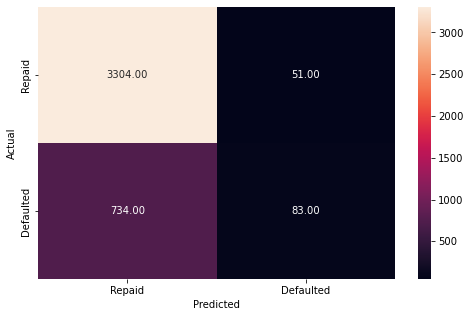

In [151]:
y_lrm_train1 = lrm_r1.predict(X1_train_sc)

metrics_score(y1_train_sc, y_lrm_train1)

**Observations**:
* The initial logisitic regression model scores quite poorly on recall, only 0.10. It is predicting that most people will repay their loans, and only a small fraction will default.
* This is true regardless of using Lasso regularization or not.

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1416
           1       0.53      0.08      0.14       372

    accuracy                           0.79      1788
   macro avg       0.66      0.53      0.51      1788
weighted avg       0.74      0.79      0.73      1788



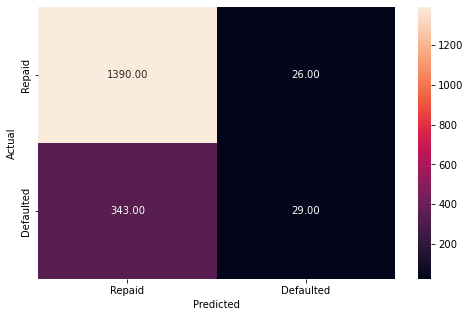

In [152]:
y_lrm_test1 = lrm_r1.predict(X1_test_sc)

metrics_score(y1_test_sc, y_lrm_test1)

**Observations**:
* The model performs even worse on the test data - the recall score for class 1 is only 0.08.

#### Logistic Regression for Data Treatment 2

In [153]:
# Creating logistic regression model for data treatment 2
lrm2 = LogisticRegression(penalty = 'none')

lrm2.fit(X2_train_sc, y2_train_sc)

lr2_error_rate = (1 - lrm2.score(X2_train_sc, y2_train_sc))*100

lrm_r2 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrm_r2.fit(X2_train_sc, y2_train_sc)

lrm_r2_error_rate = (1 - lrm_r2.score(X2_train_sc, y2_train_sc))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr2_error_rate, 2)))

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r2_error_rate, 2)))

Logistic Regression error rate using all the features is 15.36% 
Logistic Regression error rate using absolute value (Lasso) regularization is 15.39% 


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3355
           1       0.74      0.33      0.46       817

    accuracy                           0.85      4172
   macro avg       0.80      0.65      0.68      4172
weighted avg       0.83      0.85      0.82      4172



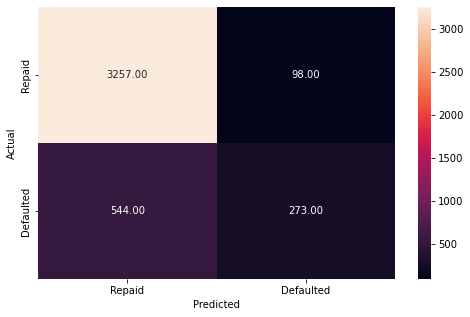

In [154]:
y_lrm_train2 = lrm_r2.predict(X2_train_sc)

metrics_score(y2_train_sc, y_lrm_train2)

**Observations**:
* The recall score is much better when using data treatment 2 with recall = 0.33 vs. 0.10, but this is still low and the regression method is still predicting a low default rate.
* Similar results are obtained with and without Lasso regularization.

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1416
           1       0.70      0.28      0.40       372

    accuracy                           0.83      1788
   macro avg       0.77      0.63      0.65      1788
weighted avg       0.81      0.83      0.80      1788



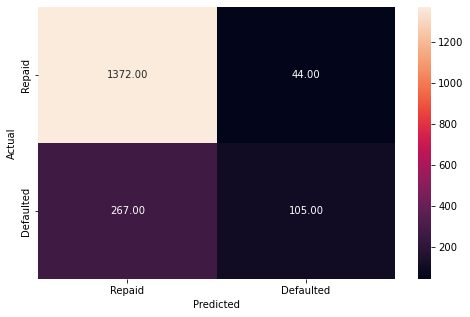

In [155]:
y_lrm_test2 = lrm_r2.predict(X2_test_sc)

metrics_score(y2_test_sc, y_lrm_test2)

**Observations**:
* The regression model performs slightly worse on the test data compared to the training data with a recall score of 0.28 compared to 0.33 for the training data. 

#### Logistic Regression for Data Treatment 3

In [156]:
# Creating logistic regression model for data treatment 3
lrm3 = LogisticRegression(penalty = 'none')

lrm3.fit(X3_train_sc, y3_train_sc)

lr3_error_rate = (1 - lrm3.score(X3_train_sc, y3_train_sc))*100

lrm_r3 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrm_r3.fit(X3_train_sc, y3_train_sc)

lrm_r3_error_rate = (1 - lrm_r3.score(X3_train_sc, y3_train_sc))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr3_error_rate, 2)))

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r3_error_rate, 2)))

Logistic Regression error rate using all the features is 15.51% 
Logistic Regression error rate using absolute value (Lasso) regularization is 15.56% 


              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3355
           1       0.73      0.32      0.45       817

    accuracy                           0.84      4172
   macro avg       0.79      0.65      0.68      4172
weighted avg       0.83      0.84      0.82      4172



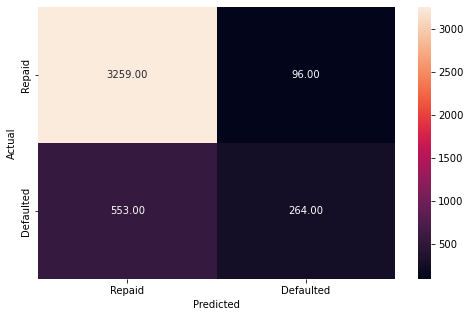

In [157]:
y_lrm_train3 = lrm_r3.predict(X3_train_sc)

metrics_score(y3_train_sc, y_lrm_train3)

**Observations**:
* These results are similar to the results for data treatment 2, with a recall score of 0.32 for class 1. 
* Similar results are obtained with and without Lasso regularization.

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1416
           1       0.72      0.28      0.41       372

    accuracy                           0.83      1788
   macro avg       0.78      0.63      0.65      1788
weighted avg       0.81      0.83      0.80      1788



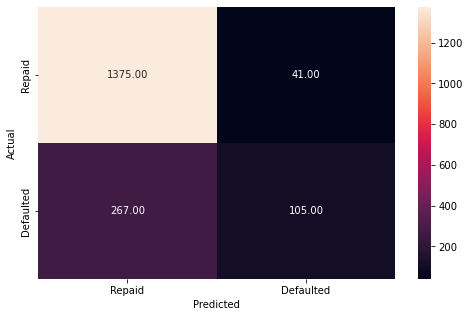

In [158]:
y_lrm_test3 = lrm_r3.predict(X3_test_sc)

metrics_score(y3_test_sc, y_lrm_test3)

**Observations**:
* Again, the regression model performs slightly worse on the test data compared to the training data with a recall score of 0.28 compared to 0.32 for the training data. 

#### Logistic Regression for Data Treatment 4

In [159]:
# Creating logistic regression model for data treatment 4
lrm4 = LogisticRegression(penalty = 'none')

lrm4.fit(X4_train_sc, y4_train_sc)

lr4_error_rate = (1 - lrm4.score(X4_train_sc, y4_train_sc))*100

lrm_r4 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrm_r4.fit(X4_train_sc, y4_train_sc)

lrm_r4_error_rate = (1 - lrm_r4.score(X4_train_sc, y4_train_sc))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr4_error_rate, 2)))

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r4_error_rate, 2)))

Logistic Regression error rate using all the features is 17.43% 
Logistic Regression error rate using absolute value (Lasso) regularization is 17.43% 


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3355
           1       0.61      0.30      0.40       817

    accuracy                           0.83      4172
   macro avg       0.73      0.63      0.65      4172
weighted avg       0.80      0.83      0.80      4172



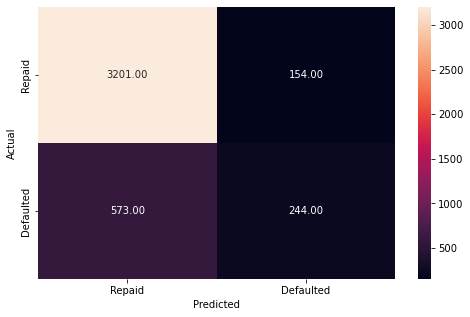

In [160]:
y_lrm_train4 = lrm_r4.predict(X4_train_sc)

metrics_score(y4_train_sc, y_lrm_train4)

**Observations**:
* These results are similar to the results for data treatments 2 and 3, with a recall score of 0.30 for class 1. 
* Similar results are obtained with and without Lasso regularization.

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1416
           1       0.63      0.26      0.37       372

    accuracy                           0.81      1788
   macro avg       0.73      0.61      0.63      1788
weighted avg       0.79      0.81      0.78      1788



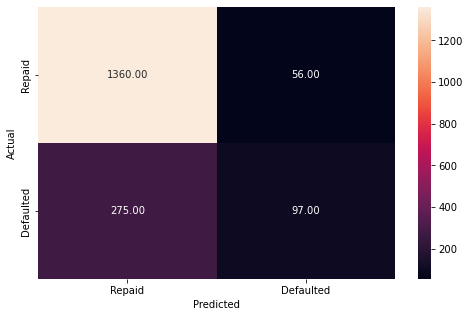

In [161]:
y_lrm_test4 = lrm_r4.predict(X4_test_sc)

metrics_score(y4_test_sc, y_lrm_test4)

**Observations**:
* Again, the regression model performs slightly worse on the test data compared to the training data with a recall score of 0.26 compared to 0.30 for the training data. 

#### Logistic Regression for Data Treatment 5

In [162]:
# Creating logistic regression model for data treatment 5
lrm5 = LogisticRegression(penalty = 'none')

lrm5.fit(X5_train_sc, y5_train_sc)

lr5_error_rate = (1 - lrm5.score(X5_train_sc, y5_train_sc))*100

lrm_r5 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrm_r5.fit(X5_train_sc, y5_train_sc)

lrm_r5_error_rate = (1 - lrm_r5.score(X5_train_sc, y5_train_sc))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr5_error_rate, 2)))

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r5_error_rate, 2)))

Logistic Regression error rate using all the features is 7.94% 
Logistic Regression error rate using absolute value (Lasso) regularization is 8.03% 


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2151
           1       1.00      0.07      0.13       203

    accuracy                           0.92      2354
   macro avg       0.96      0.53      0.54      2354
weighted avg       0.93      0.92      0.89      2354



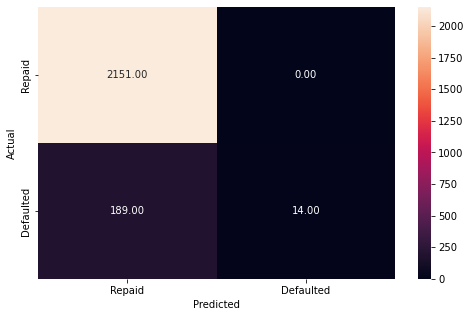

In [163]:
y_lrm_train5 = lrm_r5.predict(X5_train_sc)

metrics_score(y5_train_sc, y_lrm_train5)

**Observations**:
* The logisitic regression model scores quite poorly on recall for data treatment 5, only 0.07. It is predicting that most people will repay their loans, and only the smallest fraction will default.
* This is true regardless of using Lasso regularization or not.

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       913
           1       0.00      0.00      0.00        97

    accuracy                           0.90      1010
   macro avg       0.45      0.50      0.47      1010
weighted avg       0.82      0.90      0.86      1010



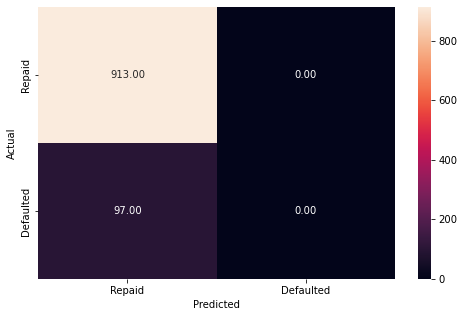

In [164]:
y_lrm_test5 = lrm_r5.predict(X5_test_sc)

metrics_score(y5_test_sc, y_lrm_test5)

**Observations**:
* The model is predicting that none of the clients in the test data will default, with a recall score of 0. 
* Data treatment 5 results in a poor model again, as there are too few cases of clients defaulting in the dataset with all entries removed that at least one null value.

### Overall Observations: Initial Logistic Regression model
* The data was scaled and logistic regression was run for each of the five data treatments with and without Lasso regularization.
* Compared to the initial decision tree and random forest models, logistic regression resulted in lower recall scores, as a higher percentage of clients were expected to repay their loans, even when they defaulted. 
* Recall scores were particularly low for data treatment 1 (all outliers treated) and data treatment 5 (entries with null values removed) with recall scores less than or equal to 0.10.
* Data treatments 2, 3, and 4 achieved higher recall scores with the logistic regression model, ranging from 0.30 to 0.34 on the training data, and 0.26 to 0.28 on the test data. 
* **Data treatment 2** will be used going forward with logistic regression.
* SMOTE analysis will be performed, the coefficients for logisitic regression will be checked, and the precision-recall curve will be plotted.

### Logistic Regression with SMOTE Analysis

**Creating SMOTE datasets with scaled values**

In [165]:
# SMOTE datasets for logisitic regression, scaled
sm2_sc = SMOTE(random_state=42)
X2_smosc, y2_smosc = sm2_sc.fit_resample(X2_train_sc, y2_train_sc)

sm3_sc = SMOTE(random_state=42)
X3_smosc, y3_smosc = sm3_sc.fit_resample(X3_train_sc, y3_train_sc)


In [166]:
# Creating logistic regression model for data treatment 2 with SMOTE analysis
lr2_smo = LogisticRegression(penalty = 'none')

lr2_smo.fit(X2_smosc, y2_smosc)

lr2_smo_error_rate = (1 - lr2_smo.score(X2_smosc, y2_smosc))*100

lrl2_smo = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrl2_smo.fit(X2_smosc, y2_smosc)

lrl2_smo_error_rate = (1 - lrl2_smo.score(X2_smosc, y2_smosc))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr2_smo_error_rate, 2)))

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrl2_smo_error_rate, 2)))

Logistic Regression error rate using all the features is 28.27% 
Logistic Regression error rate using absolute value (Lasso) regularization is 28.26% 


              precision    recall  f1-score   support

           0       0.70      0.76      0.73      3355
           1       0.74      0.67      0.70      3355

    accuracy                           0.72      6710
   macro avg       0.72      0.72      0.72      6710
weighted avg       0.72      0.72      0.72      6710



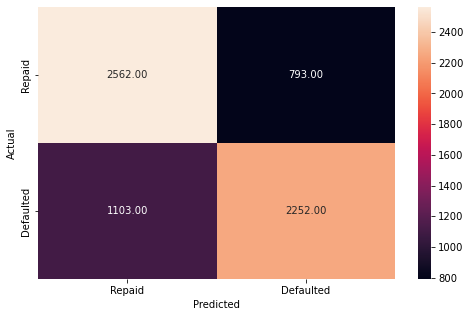

In [167]:
y_lrl_smo_train2 = lrl2_smo.predict(X2_smosc)

metrics_score(y2_smosc, y_lrl_smo_train2)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1416
           1       0.43      0.67      0.52       372

    accuracy                           0.75      1788
   macro avg       0.66      0.72      0.67      1788
weighted avg       0.80      0.75      0.76      1788



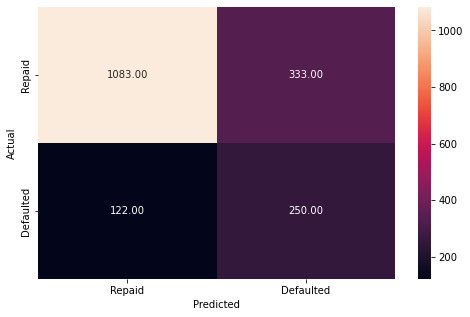

In [168]:
y_lrl_smo_test2 = lrl2_smo.predict(X2_test_sc)

metrics_score(y2_test_sc, y_lrl_smo_test2)

**Observations**:
* Recall is much higher (0.67 both both training and testing data) with SMOTE analysis compared to without SMOTE analysis (0.28-0.33).
* Precision is quite low for test data, however.

In [169]:
# Creating logistic regression model for data treatment 3 with SMOTE analysis
lr3_smo = LogisticRegression(penalty = 'none')

lr3_smo.fit(X3_smosc, y3_smosc)

lr3_smo_error_rate = (1 - lr3_smo.score(X3_smosc, y3_smosc))*100

lrl3_smo = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrl3_smo.fit(X3_smosc, y3_smosc)

lrl3_smo_error_rate = (1 - lrl3_smo.score(X3_smosc, y3_smosc))*100

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr3_smo_error_rate, 2)))

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrl3_smo_error_rate, 2)))

Logistic Regression error rate using all the features is 28.26% 
Logistic Regression error rate using absolute value (Lasso) regularization is 28.3% 


              precision    recall  f1-score   support

           0       0.70      0.76      0.73      3355
           1       0.74      0.68      0.71      3355

    accuracy                           0.72      6710
   macro avg       0.72      0.72      0.72      6710
weighted avg       0.72      0.72      0.72      6710



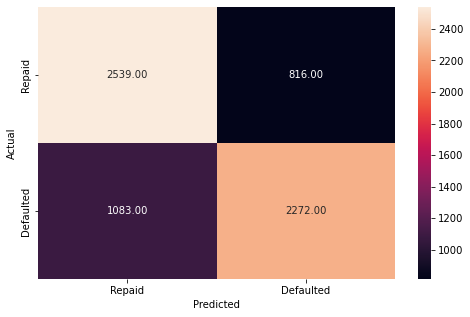

In [170]:
y_lrl_smo_train3 = lrl3_smo.predict(X3_smosc)

metrics_score(y3_smosc, y_lrl_smo_train3)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1416
           1       0.43      0.67      0.52       372

    accuracy                           0.74      1788
   macro avg       0.66      0.72      0.67      1788
weighted avg       0.80      0.74      0.76      1788



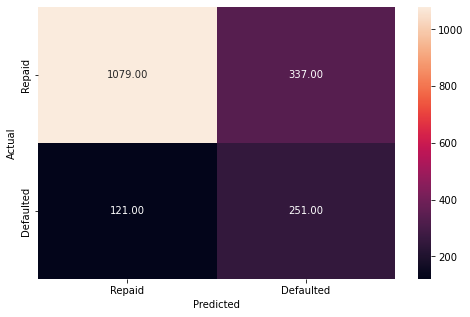

In [171]:
y_lrl_smo_test3 = lrl3_smo.predict(X3_test_sc)

metrics_score(y3_test_sc, y_lrl_smo_test3)

**Observations**:
* Essentially the same results as with data treatment 2.

#### Checking Logistic Regresion Coefficients

In [172]:
# Printing the coefficients of logistic regression for data treatment 2 with SMOTE analysis
cols = X2_sc.columns

coef_lg = lrl2_smo.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DELINQ,0.822106
DEBTINC,0.619645
DEROG,0.491490
NINQ,0.277293
VALUE,0.152664
JOB_Sales,0.107191
JOB_Self,0.049928
JOB_Mgr,0.014291
REASON_HomeImp,0.000281
JOB_Other,0.000000


**Observations**:
* The features with the highest coefficients positively effect the default rate.
* The features with the highest positive values include the number of delinquent credit lines, debt-to-income ratio, number of derogatory reports, number of recent inquiries, and value of home property.
* The most negative coefficients are features that positively effect the repayment rate. 
* The most negative features include age of oldest credit line, if you are an office worker, loan amount, amount still due on mortgage, and number of credit lines.

In [173]:
# Finding the odds for data treatment 2
odds = np.exp(lrl2_smo.coef_[0]) 

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X2_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
DELINQ,2.275286
DEBTINC,1.858268
DEROG,1.634750
NINQ,1.319553
VALUE,1.164933
JOB_Sales,1.113147
JOB_Self,1.051195
JOB_Mgr,1.014394
REASON_HomeImp,1.000281
JOB_Other,1.000000


### **Observations**:
* Having more deliquent credit lines results in a client who is 2.3 times more likely to default compared to those without deliquent credit lines.
* As seen above, higher debt-to-income ratios, more derogatory reports, and a higher number of recent inquiries leads to higher default rates, and these features seem to be the most important for logistic regression.

#### Plotting the Precision-Recall Curve

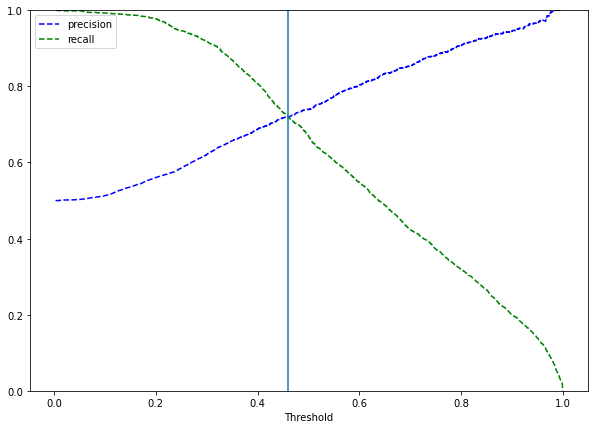

In [174]:
# Plotting Precision-Recall Curve for data treatment 2
y_scores_lg = lrl2_smo.predict_proba(X2_smosc) 

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y2_smosc, y_scores_lg[:, 1])

plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.axvline(0.46)

plt.show()

**Observations**:
* Precision and recall are balanced for a threshold of ~0.46.
* Can check the performance of the model at this threshold.

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3355
           1       0.72      0.72      0.72      3355

    accuracy                           0.72      6710
   macro avg       0.72      0.72      0.72      6710
weighted avg       0.72      0.72      0.72      6710



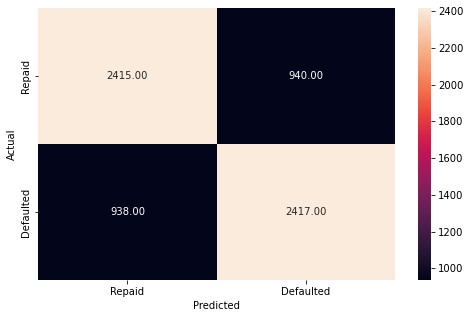

In [175]:
optimal_threshold1 = .46

y_pred_train2_lda = lrl2_smo.predict_proba(X2_smosc)

metrics_score(y2_smosc, y_pred_train2_lda[:, 1:] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1416
           1       0.41      0.73      0.53       372

    accuracy                           0.73      1788
   macro avg       0.66      0.73      0.67      1788
weighted avg       0.81      0.73      0.75      1788



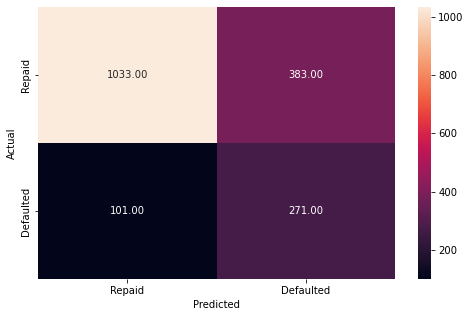

In [176]:
optimal_threshold1 = .46

y_pred_test2_lda = lrl2_smo.predict_proba(X2_test_sc)

metrics_score(y2_test_sc, y_pred_test2_lda[:, 1:] > optimal_threshold1)

**Observations**:
* Although the recall score is still lower compared to the best (tuned or non-tuned) decision tree and random forest classifiers, setting the threshold to 0.46 results in a slightly higher recall score of 0.72 for the training data and 0.73 for the test data, compared to 0.67 when not setting the threshold.
* The increase in recall is at the expense precision loss, with a precision score of 0.41 for the test data.

### KNN Model Building

* A K Neareast neighbors classifier can also be built to compare to the previous models.
* To save time, only the scaled SMOTE datasets for data treatment 2 will be performed.

In [177]:
knn2_smo = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []

test_error = []

knn_many_split2 = {}

error_df_knn = pd.DataFrame()

features = X2.columns

for k in range(1, 15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn2_smo = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new2, x_val2, y_train_new2, y_val2 = train_test_split(X2_smosc, y2_smosc, test_size = 0.30)
    
        # Fitting K-NN on the training data
        knn2_smo.fit(x_train_new2, y_train_new2)
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn2_smo.score(x_train_new2, y_train_new2)) 
        
        test_error.append(1 - knn2_smo.score(x_val2, y_val2))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split2[k] = lista

knn_many_split2

{1: [0.0, 0.01631064745818844],
 2: [0.007714143779717549, 0.029094220897499586],
 3: [0.01163863458945426, 0.031892697466467966],
 4: [0.02058760911219928, 0.0439311144229177],
 5: [0.024135973316301188, 0.05161450571286639],
 6: [0.03285785252998368, 0.06189766517635371],
 7: [0.040919736001703226, 0.07544295413147871],
 8: [0.04932226243701654, 0.08271236959761552],
 9: [0.060747995174224675, 0.09908925318761384],
 10: [0.06757504790291677, 0.10438814373240599],
 11: [0.08152721595344545, 0.11813214108296077],
 12: [0.08809878645944219, 0.1238615664845173],
 13: [0.10246256475764673, 0.13967544295413148],
 14: [0.10914058618976652, 0.13982447425070374]}

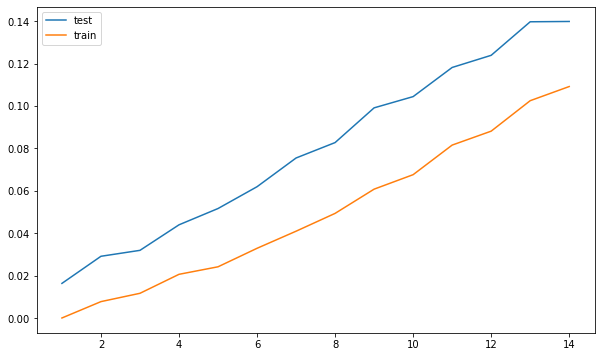

In [178]:
kltest = []

vltest = []

for k, v in knn_many_split2.items():
    kltest.append(k)
    
    vltest.append(knn_many_split2[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split2.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split2[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Observations**:
* The split for each k value continues to increase, there is not clear 'elbow' or maximum k up to 15.

In [179]:
# Define K-NN model
knn = KNeighborsClassifier(n_neighbors = 14)

In [180]:
# Fitting data to the K-NN model

knn.fit(X2_smosc,y2_smosc)

KNeighborsClassifier(n_neighbors=14)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3355
           1       0.94      0.93      0.94      3355

    accuracy                           0.94      6710
   macro avg       0.94      0.94      0.94      6710
weighted avg       0.94      0.94      0.94      6710



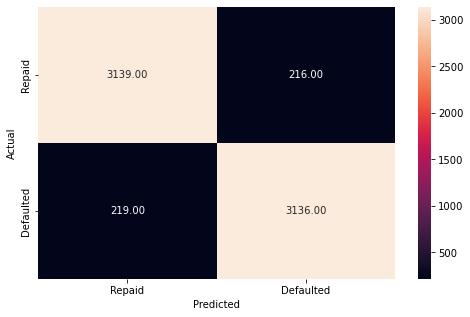

In [181]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(X2_smosc)

metrics_score(y2_smosc, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1416
           1       0.69      0.72      0.71       372

    accuracy                           0.88      1788
   macro avg       0.81      0.82      0.81      1788
weighted avg       0.88      0.88      0.88      1788



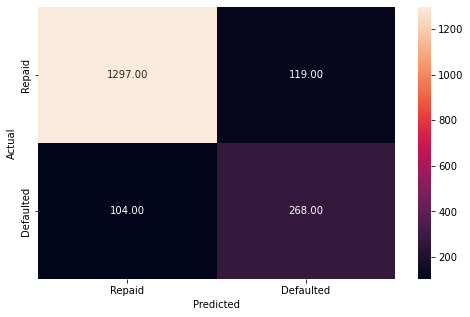

In [182]:
# Checking the performance of K-NN model on the training data
y_pred_test_knn = knn.predict(X2_test_sc)

metrics_score(y2_test_sc, y_pred_test_knn)

**Observations**:
* The KNN model is overfitting the training data, although the model is still achieving a recall score greater than 0.70 on the test data. 
* The model can be tuned to try and improve recall score.

* n_neighbors: number of neighbors used in algorithm
* weights: either not applied, or apply weights by inverse distance
* p: manhattan vs. euclidean distance

In [183]:
# Tuning the KNN model
params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(X2_smosc, y2_smosc)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


In [184]:
# Fit the best estimator on the training data
knn_estimator.fit(X2_smosc, y2_smosc)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00      3355

    accuracy                           1.00      6710
   macro avg       1.00      1.00      1.00      6710
weighted avg       1.00      1.00      1.00      6710



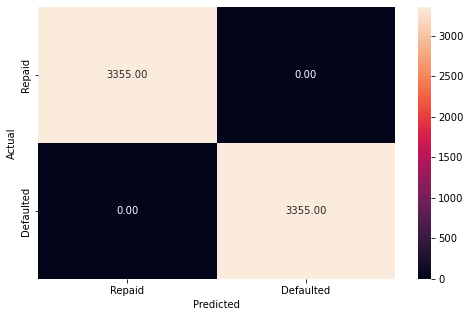

In [185]:
y_pred_train_knn_estimator = knn_estimator.predict(X2_smosc)

metrics_score(y2_smosc, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1416
           1       0.97      0.80      0.88       372

    accuracy                           0.95      1788
   macro avg       0.96      0.90      0.92      1788
weighted avg       0.95      0.95      0.95      1788



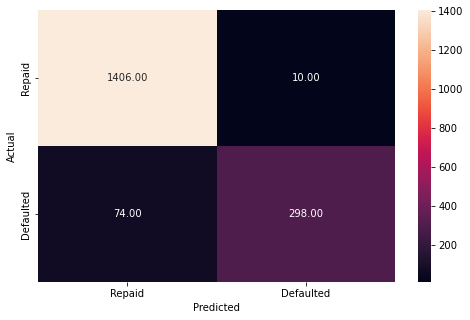

In [186]:
y_pred_test_knn_estimator = knn_estimator.predict(X2_test_sc)

metrics_score(y2_test_sc, y_pred_test_knn_estimator)

**Observations**:
* The tuned KNN model is still overfitting the training data, although the recall score has again improved for class 1 with 0.80, and precision and accuracy are both high.
* It is suprising that the tuned model seems to result in even more overfitting of the training data.

### Comparing Model Performances

In [187]:
# Function to calculate recall score to place in comparison table
def get_recall_score(model,flag=True,X_train=X2_smo,X_test=X2_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X2_smo)
    pred_test = model.predict(X2_test)
    train_recall = metrics.recall_score(y2_smo,pred_train)
    test_recall = metrics.recall_score(y2_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y2_smo,pred_train))
        print("Recall on test set : ",metrics.recall_score(y2_test,pred_test))
    
    return a # returning the list with train and test scores

In [188]:
#  Function to calculate precision score to place in comparison table
def get_precision_score(model,flag=True,X_train=X2_smo,X_test=X2_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X2_smo)
    pred_test = model.predict(X2_test)
    train_precision = metrics.precision_score(y2_smo,pred_train)
    test_precision = metrics.precision_score(y2_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y2_smo,pred_train))
        print("Precision on test set : ",metrics.precision_score(y2_test,pred_test))

    return b # returning the list with train and test scores

In [189]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X2_smo,X_test=X2_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X2_smo,y2_smo)
    test_acc = model.score(X2_test,y2_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X2_smo,y2_smo))
        print("Accuracy on test set : ",model.score(X2_test,y2_test))
    
    return c # returning the list with train and test scores

In [190]:
# Make the list of model names 

models = [d_tree2_smo, d_tree_tuned, d_tree_tuned2, rf_estimator2_smo, rf_estimator_tuned, rf_estimator_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [191]:
# Make table of model comparisons

comparison_frame = pd.DataFrame({'Model':['Decision Tree 70/30', 'Dec Tree Tuned', 'Dec Tree Tuned 2', 'Random Forest 70/30', 'Ran Forest Tuned', 'Ran Forest Tuned 2'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree 70/30,1.000000,0.865772,1.000000,0.639785,1.000000,0.691860
1,Dec Tree Tuned,0.903428,0.865213,0.871237,0.612903,0.931188,0.701538
2,Dec Tree Tuned 2,0.845902,0.837808,0.833383,0.766129,0.854784,0.584016
3,Random Forest 70/30,1.000000,0.937360,1.000000,0.768817,1.000000,0.916667
4,Ran Forest Tuned,0.910432,0.866890,0.881967,0.602151,0.935209,0.713376
5,Ran Forest Tuned 2,0.882563,0.871924,0.853949,0.706989,0.905786,0.686684


In [192]:
# Functions to calculate different scores for scaled data
def get_recall_score2(model,flag=True,X_train=X2_smosc,X_test=X2_test_sc):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X2_smosc)
    pred_test = model.predict(X2_test_sc)
    train_recall = metrics.recall_score(y2_smosc,pred_train)
    test_recall = metrics.recall_score(y2_test_sc,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y2_smosc,pred_train))
        print("Recall on test set : ",metrics.recall_score(y2_test_sc,pred_test))
    
    return a # returning the list with train and test scores


def get_precision_score2(model,flag=True,X_train=X2_smosc,X_test=X2_test_sc):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X2_smosc)
    pred_test = model.predict(X2_test_sc)
    train_precision = metrics.precision_score(y2_smosc,pred_train)
    test_precision = metrics.precision_score(y2_test_sc,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y2_smosc,pred_train))
        print("Precision on test set : ",metrics.precision_score(y2_test_sc,pred_test))

    return b # returning the list with train and test scores


def get_accuracy_score2(model,flag=True,X_train=X2_smosc,X_test=X2_test_sc):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X2_smosc,y2_smosc)
    test_acc = model.score(X2_test_sc,y2_test_sc)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X2_smosc,y2_smosc))
        print("Accuracy on test set : ",model.score(X2_test_sc,y2_test_sc))
    
    return c # returning the list with train and test scores

In [193]:
# Make the list of all the model names for 75/25 splits

models = [lr2_smo, lrl2_smo, knn, knn_estimator]

# defining empty lists to add train and test results
acc_train2 = []
acc_test2 = []
recall_train2 = []
recall_test2 = []
precision_train2 = []
precision_test2 = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score2(model,False)
    acc_train2.append(j[0])
    acc_test2.append(j[1])

    # recall score
    k = get_recall_score2(model,False)
    recall_train2.append(k[0])
    recall_test2.append(k[1])

    # precision score
    l = get_precision_score2(model,False)
    precision_train2.append(l[0])
    precision_test2.append(l[1])

In [194]:
comparison_frame2 = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression with Lasso', 'KNN', 'KNN Tuned'], 
                                          'Train_Accuracy': acc_train2,
                                          'Test_Accuracy': acc_test2,
                                          'Train_Recall': recall_train2,
                                          'Test_Recall': recall_test2,
                                          'Train_Precision': precision_train2,
                                          'Test_Precision': precision_test2}) 

comparison_frame2

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.717288,0.746085,0.671237,0.672043,0.739330,0.429553
1,Logistic Regression with Lasso,0.717437,0.745526,0.671237,0.672043,0.739573,0.428816
2,KNN,0.935171,0.875280,0.934724,0.720430,0.935561,0.692506
3,KNN Tuned,1.000000,0.953020,1.000000,0.801075,1.000000,0.967532


In [195]:
# Adding results dataframes together
frames = [comparison_frame, comparison_frame2]

comb_result = pd.concat(frames)

comb_result.reset_index()

,index,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,0,Decision Tree 70/30,1.000000,0.865772,1.000000,0.639785,1.000000,0.691860
1,1,Dec Tree Tuned,0.903428,0.865213,0.871237,0.612903,0.931188,0.701538
2,2,Dec Tree Tuned 2,0.845902,0.837808,0.833383,0.766129,0.854784,0.584016
3,3,Random Forest 70/30,1.000000,0.937360,1.000000,0.768817,1.000000,0.916667
4,4,Ran Forest Tuned,0.910432,0.866890,0.881967,0.602151,0.935209,0.713376
5,5,Ran Forest Tuned 2,0.882563,0.871924,0.853949,0.706989,0.905786,0.686684
6,0,Logistic Regression,0.717288,0.746085,0.671237,0.672043,0.739330,0.429553
7,1,Logistic Regression with Lasso,0.717437,0.745526,0.671237,0.672043,0.739573,0.428816
8,2,KNN,0.935171,0.875280,0.934724,0.720430,0.935561,0.692506
9,3,KNN Tuned,1.000000,0.953020,1.000000,0.801075,1.000000,0.967532


## Results from Data Exploration and Model Development

**Data Exploration**
* Data was explored through univariate and bivariate analysis.
* The data contained many null values, in some cases greater than 10% of the entries for a data feature were null (up to 21% for debt-to-income ratio). 
* Clients requested loans for either debt consolidation (66% of data) or home improvement (30% of data) and loans for debt consolidation tended to be slightly higher compared to home improvement loans. 
* A plurality of clients listed their job as 'Other' although there were also office workers, salespeople, self-employed clients, managers, and professional executives in the dataset.
* Salespeople and self-employed clients exhibited a slightly higher average default rate (30-34%) compared to clients with other jobs, however there were also fewer salespeople and self-employed clients in the dataset.
* There were not many strong linear correlations among numerical variables in the dataset apart from home property value and mortgage still due.
* The outcome of a loan default ('BAD' = 1) was positively correlated with number of derogatory reports, number of deliquent credit lines, debt-to-income ratio, and number of recent inquiries. All of these correlations make sense, as we would expect clients who default to have higher debt-to-income ratios and more reports into their credit behavior compared to other clients.
* All of the entries greater than zero for derogatory reports and delinquent credit lines were considered outliers, which means attention must be paid to these data features when treating for outliers.

**Data Treatment**
* The dataset was treated with five different methods, as outlined above. After data treatment, the dependent variable 'BAD' was separated from the independent variables, dummy variables were created for the categorical variables, and for each treatment, the data was split into training and testing sets, initially in a 70/30 split. 
* For logistic regression, data was also scaled. 
* Initial decision tree, random forest, and linear regression models were used and a metrics score function was used to assess the recall, precision, and accuracy for the models with each of the data treatments.
* Data treatment 1 that removed all outliers included DEROG and DELINQ and data treatment 5 that removed outliers and removed all entries with at least one null value performed poorly compared to Data treatments 2, 3, and 4 which all kept at least some outliers for DEROG and DELINQ, and kept all outliers in the case of data treatment 2.
* Data treatment 2 was used going forward and the decision tree and random forest models were compared with and without class weights, and with different train/test splits - the initial split was 70/30, and 75/25 and 80/20 splits were also examined. 
* SMOTE analysis was also used for data treatment 2 and 3, and was carried forwards through tuning for decision trees, random forests, and KNN.
* The decision tree and random forest models were also tuned with three hyperparameters as a first pass, and then six hyperparameters for the decision tree and six hyperparameters for the random forest model at second pass. 
* The logistic regression model was compared with and without Lasso regularization.
* A KNN model was also developed and tuned with SMOTE analysis.

**Model Comparison**
* A table with all 10 models using data treatment 2 and SMOTE analysis are shown above. 
* The decision tree and random forest models before tuning all overfit the training data compared to the testing data, these models had 100% accuracy and recall on the training data, but only 63-77% recall on the test data.
* Tuning the decision tree model improved recall to some extent, with 77% recall for the second tuned decision tree, but only 58% precision. Interestingly, although tuning the random forest model did result in less overfitting of the training data, it also resulted in lower recall compared to the non-tuned forest (71% vs. 77%). Perhaps the outliers added in by SMOTE made it difficult to tune the test data. 
* Generally, different splitting for decision trees and random forests did not markedly improve recall, precision or accuracy.
* Logisitic regression models resulted in 67-73% recall for the test data, but poor precision (~40%).
* Tuning the KNN model increased recall from 72-80% and resulted in high precision, but led to overfitting of the training data. 

**Improving Performance**
* Despite trying different data treatments, data splits, weights, and different types of models, the highest recall score achieved was 80% for the tuned KNN model; precision was 97% and accuracy was 95%. These are very high scores for the KNN model with SMOTE analysis, however it should be noted that the KNN model is still overfitting the training data even after tuning.
* There is likely room to improve upon the models attempted here with more hyperparameter tuning and more careful data treatment.
* Specifically, the other data treatments and outlier treatment should be passed to tree and forest tuning, however this would take more time to look into.
* More hyperparameters could be passed during tuning or a greater range of values for each hyperparameter could be passed.
* Possibly some data features could be removed such as 'JOB' or 'REASON' which don't seem to contribute much to the different models. 

## Conclusions

**Current Model to be Adopted**
* With the current batch of models, I would propose that the tuned KNN model be implemented, although further tuning may be needed to reduce overfitting. This model has the highest recall value at 80% for the test data, 97% precision and 95% accuracy. 
* It is important to note that overfitting still occurred with tuned models for both decision trees and random forests.

**Importance of different features**
* For both the decision tree and random forest models, debt-to-income ratio and number of deliquent credit lines are the most important features.
* Other features are also important for both including number of derogatory reports and age of oldest credit line.
* Number of credit lines, number of derogatory reports, years at current job, and number of recent inquiries are all of lesser importance in the models.
* For the logistic regression models, debt-to-income ratio, number of deliquent credit lines, number of derogatory reports, and number of recent inquiries are all important for determining if a client will default. If a client has had a credit line for a long time, they are more likely to repay their loan. 
* The bank should make an effort to collect data on debt-to-income ratio as much as possible, as this feature was the most important for the decision tree and random forest models but had 21% of the column values missing. If more data was collected on this feature and then this data was passed into the model, the model may improve. 